# PROJECT - PREDICTIVE MODELING - MARRIPALLY RAVIKUMAR

## PROBLEM 1: LINEAR REGRESSION

### Problem Statement

* You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### Q1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

### Loading Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing data

In [2]:
cz=pd.read_csv('cubic_zirconia.csv')
cz.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


### Size of the Dataset

In [3]:
cz.shape

(26967, 11)

In [4]:
cz['Unnamed: 0'].unique()

array([    1,     2,     3, ..., 26965, 26966, 26967], dtype=int64)

In [5]:
cz.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
cz.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [7]:
cz.shape

(26967, 10)

### Data Types of Features

In [8]:
pd.DataFrame(cz.dtypes,columns=['Data Type']).rename_axis(index='Feature').T

Feature,carat,cut,color,clarity,depth,table,x,y,z,price
Data Type,float64,object,object,object,float64,float64,float64,float64,float64,int64


## Description of the Dataset

### Numerical Features

In [9]:
cz.describe().round(1)

,carat,depth,table,x,y,z,price
count,26967.0,26270.0,26967.0,26967.0,26967.0,26967.0,26967.0
mean,0.8,61.7,57.5,5.7,5.7,3.5,3939.5
std,0.5,1.4,2.2,1.1,1.2,0.7,4024.9
min,0.2,50.8,49.0,0.0,0.0,0.0,326.0
25%,0.4,61.0,56.0,4.7,4.7,2.9,945.0
50%,0.7,61.8,57.0,5.7,5.7,3.5,2375.0
75%,1.0,62.5,59.0,6.6,6.5,4.0,5360.0
max,4.5,73.6,79.0,10.2,58.9,31.8,18818.0


### Categorical Features

In [10]:
cz.describe(include=['O'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


## Exploratory Data Analysis

### Checking and Dropping the Duplicate Observations

In [11]:
cz.duplicated().sum()

34

In [12]:
cz.drop_duplicates(inplace=True,ignore_index=True)

In [13]:
cz.shape

(26933, 10)

### Checking for Null Values

In [14]:
pd.DataFrame(cz.isnull().sum(),columns=['No. of Null Values']).rename_axis(index='Feature').sort_values(
    by='No. of Null Values',ascending=False).T

Feature,depth,carat,cut,color,clarity,table,x,y,z,price
No. of Null Values,697,0,0,0,0,0,0,0,0,0


In [15]:
num=cz.describe().columns
num

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [16]:
cat=cz.columns.drop(num)
cat

Index(['cut', 'color', 'clarity'], dtype='object')

## Checking for Anomalies

### Checking Value Counts of Categorical Variables

In [17]:
for i in cz[cat].columns:
    print('Feature: ', i)
    print(cz[i].value_counts())
    print('------------------------')

Feature:  cut
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64
------------------------
Feature:  color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64
------------------------
Feature:  clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64
------------------------


### Checking Unique Entries of Categorical Variables

In [18]:
for i in cz[cat].columns:
    print('Feature: ', i)
    print(cz[i].unique())
    print('\n')

Feature:  cut
['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']


Feature:  color
['E' 'G' 'F' 'D' 'H' 'J' 'I']


Feature:  clarity
['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']




## Univariate Analysis

### Histogram and Box Plot of Numerical Features

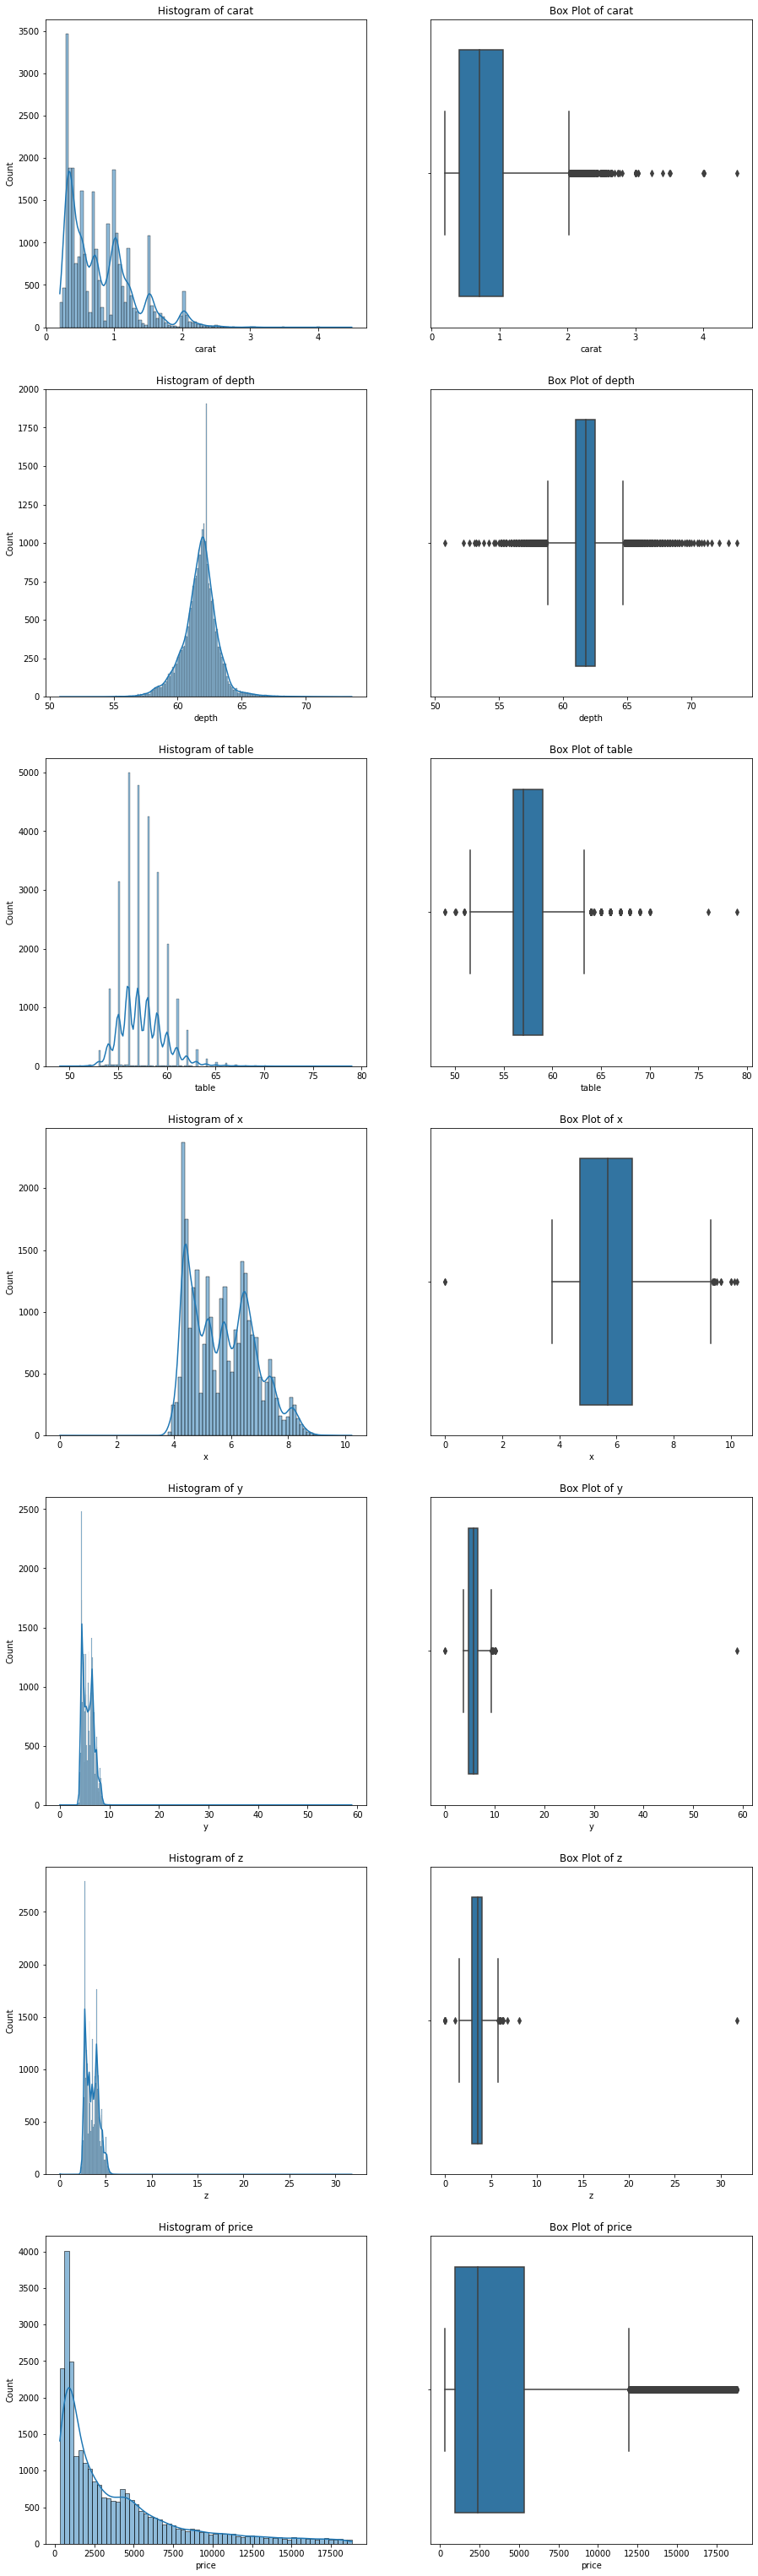

In [19]:
plt.figure(figsize=(15,55))
j=1
for i in cz[num].columns:
    plt.subplot(7,2,j)
    sns.histplot(cz[i],kde=True);
    plt.title('Histogram of '+i)
    k=j+1
    plt.subplot(7,2,k)
    sns.boxplot(cz[i]);
    plt.title('Box Plot of '+i)
    j=k+1

#### Checking Zero Values in the Dataset

In [20]:
pd.DataFrame(cz[cz==0].count(),columns=['No.of Zeros']).rename_axis(index='Feature').T

Feature,carat,cut,color,clarity,depth,table,x,y,z,price
No.of Zeros,0,0,0,0,0,0,2,2,8,0


In [21]:
q=cz[(cz.x==0)|(cz.y==0)|(cz.z==0)]
q

,carat,cut,color,clarity,depth,table,x,y,z,price
5820,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6033,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10820,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12491,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12682,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17491,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18178,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23731,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [22]:
q.index

Int64Index([5820, 6033, 10820, 12491, 12682, 17491, 18178, 23731], dtype='int64')

In [23]:
for i in cz[num].columns:
    cz[i]=np.where(cz[i]==0,np.NaN,cz[i])

In [24]:
pd.DataFrame(cz[cz==0].count(),columns=['No.of Zeros']).rename_axis(index='Feature').T

Feature,carat,cut,color,clarity,depth,table,x,y,z,price
No.of Zeros,0,0,0,0,0,0,0,0,0,0


In [25]:
cz.iloc[q.index,:]

,carat,cut,color,clarity,depth,table,x,y,z,price
5820,0.71,Good,F,SI2,64.1,60.0,NaN,NaN,NaN,2130.0
6033,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,NaN,18207.0
10820,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,NaN,17265.0
12491,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,NaN,12631.0
12682,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,NaN,3696.0
17491,1.14,Fair,G,VS1,57.5,67.0,NaN,NaN,NaN,6381.0
18178,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,NaN,3167.0
23731,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,NaN,2383.0


#### Checking Anomalies in the Dataset

In [26]:
cz.sort_values(by='y',ascending=False)[0:3]

,carat,cut,color,clarity,depth,table,x,y,z,price
25764,2.00,Premium,H,SI2,58.9,57.0,8.09,58.90,8.06,12210.0
12493,4.50,Fair,J,I1,65.8,58.0,10.23,10.16,6.72,18531.0
20484,4.01,Premium,I,I1,61.0,61.0,10.14,10.10,6.17,15223.0


In [27]:
cz.sort_values(by='z',ascending=False)[0:3]

,carat,cut,color,clarity,depth,table,x,y,z,price
344,0.51,Very Good,E,VS1,NaN,54.7,5.12,5.15,31.80,1970.0
25764,2.00,Premium,H,SI2,58.9,57.0,8.09,58.90,8.06,12210.0
12493,4.50,Fair,J,I1,65.8,58.0,10.23,10.16,6.72,18531.0


In [28]:
cz.y=cz.y.replace(58.9,10.16)
cz.z=cz.z.replace(31.8,8.06)

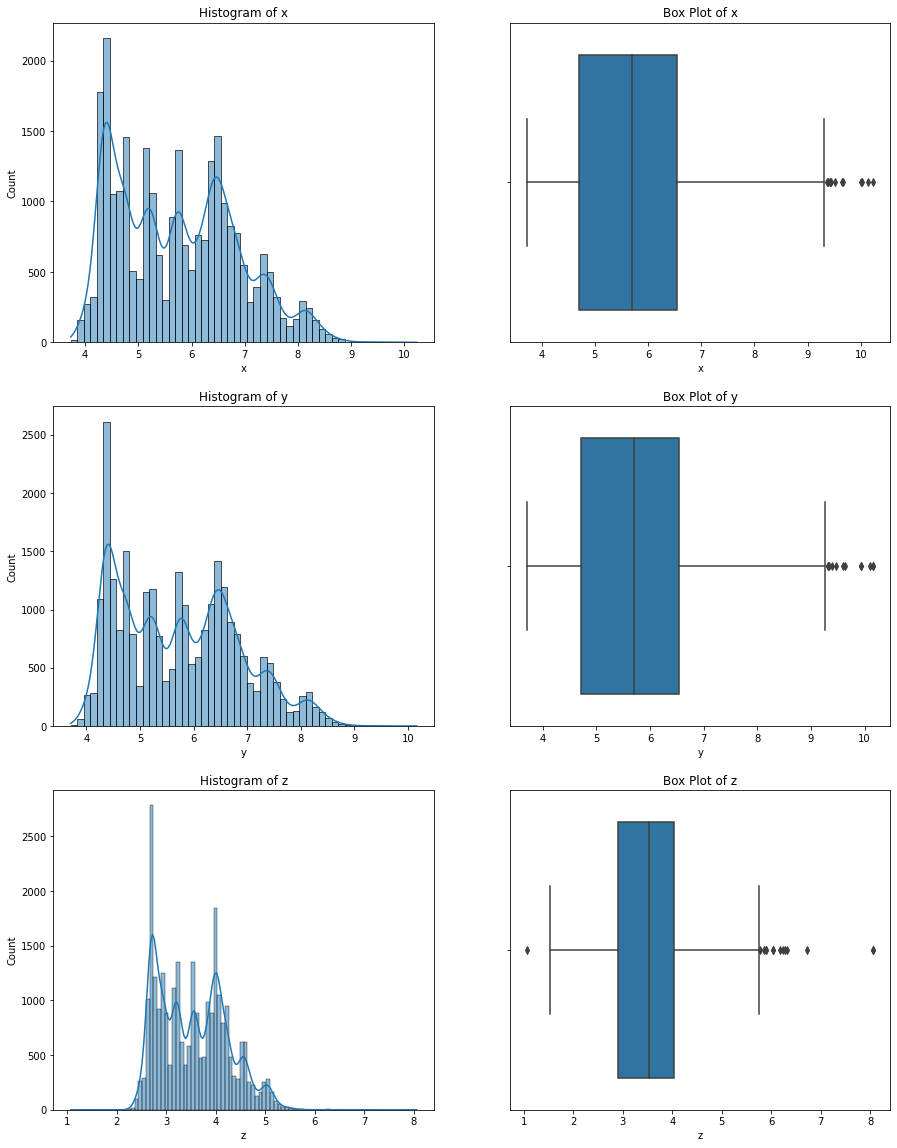

In [29]:
plt.figure(figsize=(15,20))
j=1
for i in ['x','y','z']:
    plt.subplot(3,2,j)
    sns.histplot(cz[i],kde=True);
    plt.title('Histogram of '+i)
    k=j+1
    plt.subplot(3,2,k)
    sns.boxplot(cz[i]);
    plt.title('Box Plot of '+i)
    j=k+1

### Skewness and Kurtosis

In [30]:
pd.DataFrame([cz[num].skew(),cz[num].kurtosis()],index=['Skewness','kurtosis']).rename_axis(index='Feature').T

Feature,Skewness,kurtosis
carat,1.114789,1.210845
depth,-0.026086,3.682110
table,0.765805,1.583710
x,0.402049,-0.720784
y,0.398873,-0.725070
z,0.416908,-0.587224
price,1.619116,2.152553


### Count Plot of Categorical Features

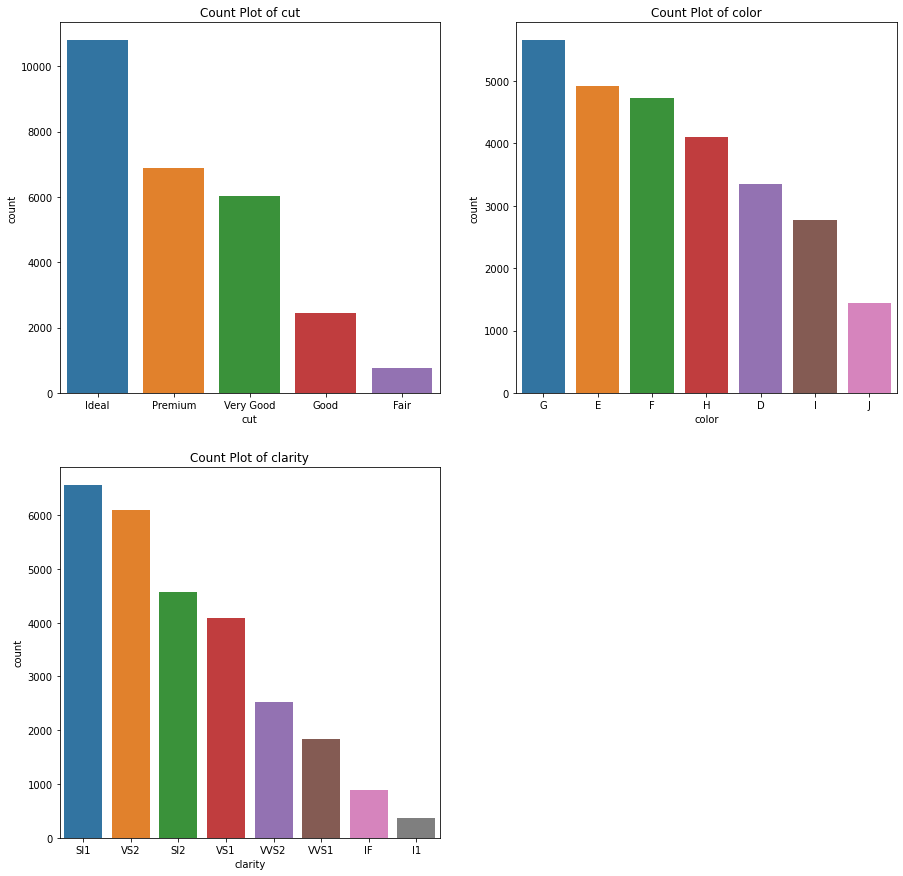

In [31]:
plt.figure(figsize=(15,15))
j=1
for i in cz[cat].columns:
    plt.subplot(2,2,j)
    b=cz[i].value_counts().sort_values(ascending=False)
    sns.countplot(cz[i],order=b.index);
    plt.title('Count Plot of '+i)
    j=j+1

## Bivariate Analysis

### Pair Plot of Numerical Features

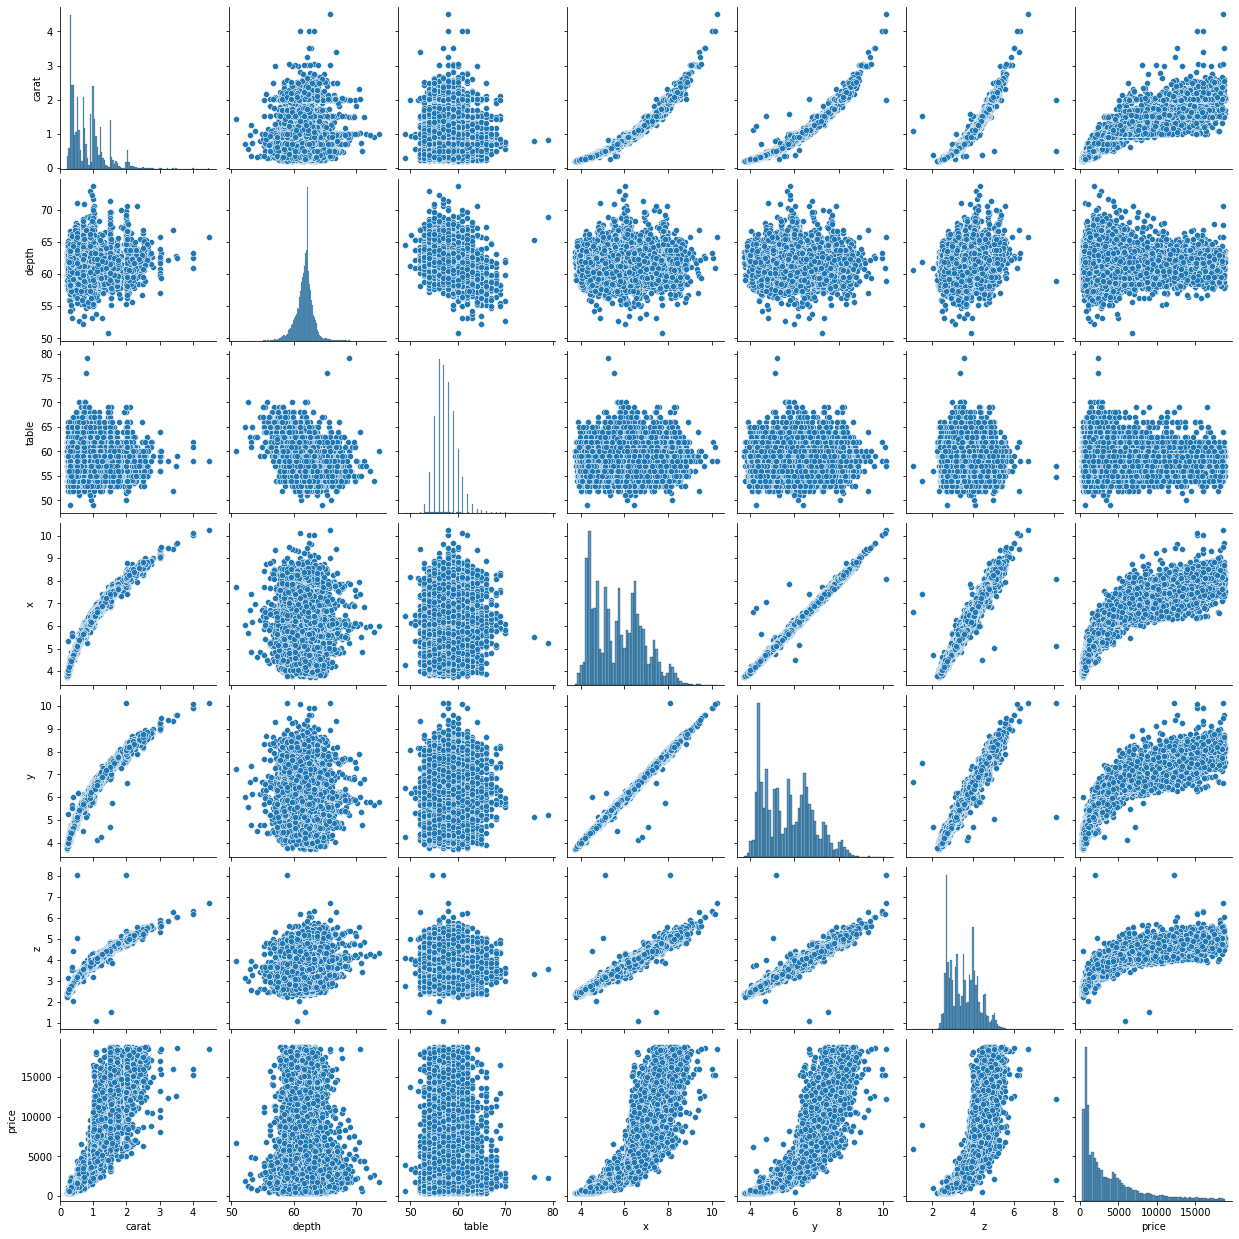

In [32]:
sns.pairplot(data=cz[num]);

### Heatmap of Numerical Features

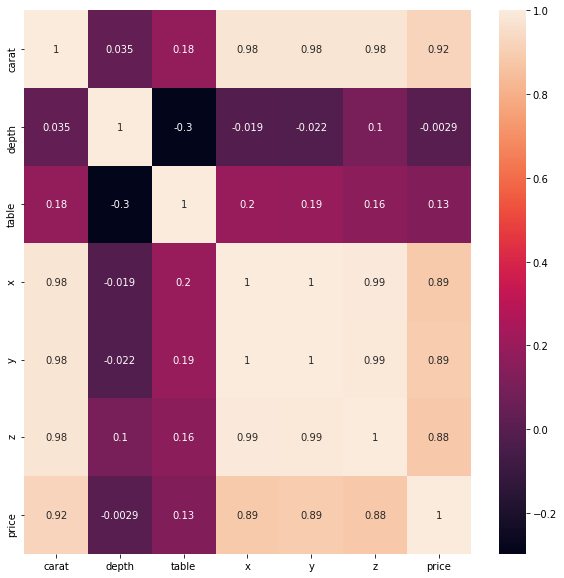

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(cz.corr(),annot=True);

### Box Plots of Price vs Categorical Features

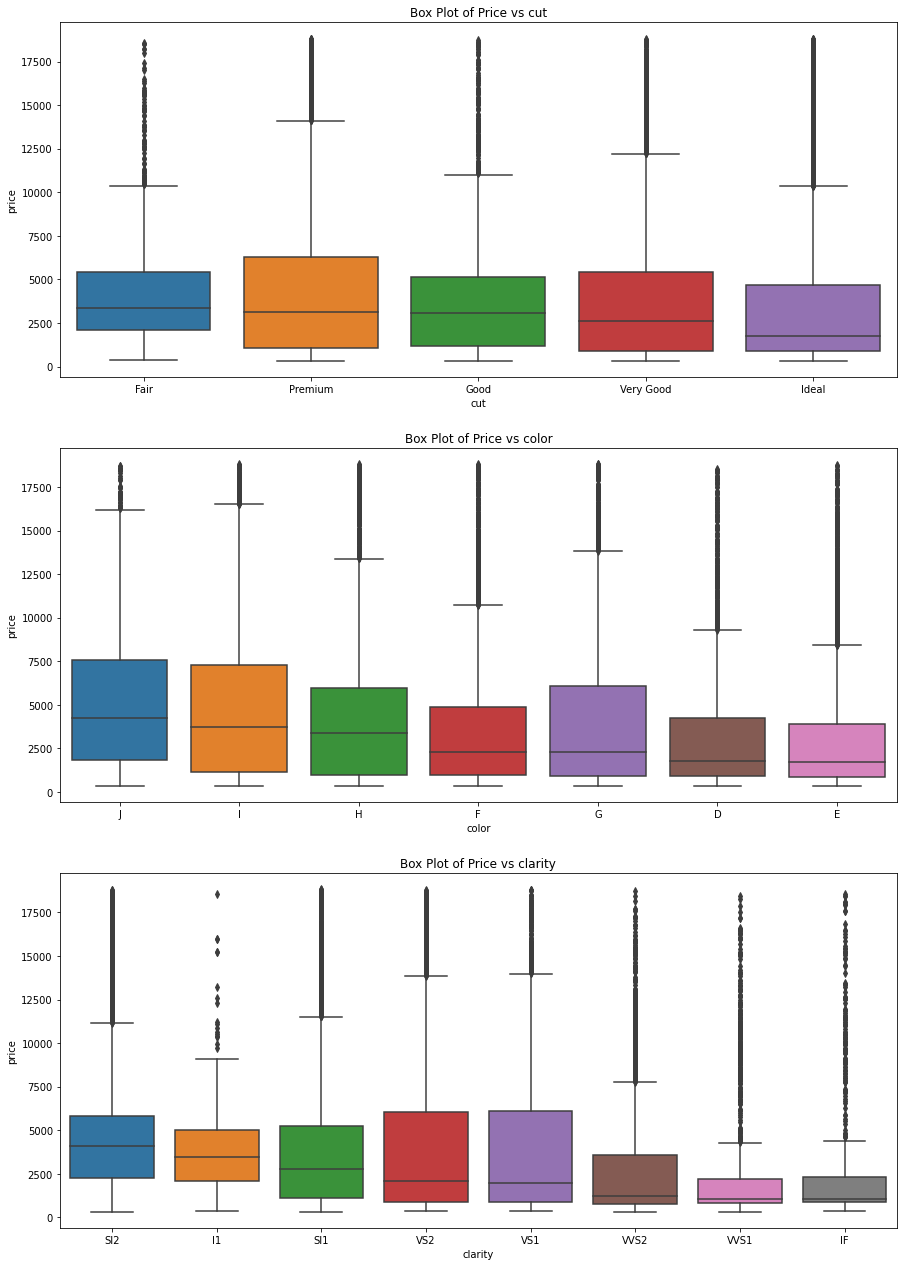

In [34]:
plt.figure(figsize=(15,30))
j=1
for i in cz[cat].columns:
    if cz[i].dtype=='object':
        plt.subplot(4,1,j)
        n=cz.groupby(i).median().sort_values(by='price',ascending=False)
        sns.boxplot(y=cz.price,x=cz[i],order=n.index);
        plt.title('Box Plot of Price vs '+i)
        j=j+1

### Q1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

### Checking for Zeros in the dataset

In [35]:
cz[cz==0].count()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Treating Null Values

In [36]:
pd.DataFrame(cz.isnull().sum(),columns=['No. of Null Values']).rename_axis(index='Feature').sort_values(
    by='No. of Null Values',ascending=False)

,No. of Null Values
Feature,
depth,697
z,8
x,2
y,2
carat,0
cut,0
color,0
clarity,0
table,0


In [37]:
for i in cz[num].columns:
    cz[i]=cz[i].fillna(cz[i].median())

In [38]:
pd.DataFrame(cz.isnull().sum(),columns=['No. of Null Values']).rename_axis(index='Feature').sort_values(
    by='No. of Null Values',ascending=False)

,No. of Null Values
Feature,
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
x,0
y,0
z,0


### Checking and Treating Outliers

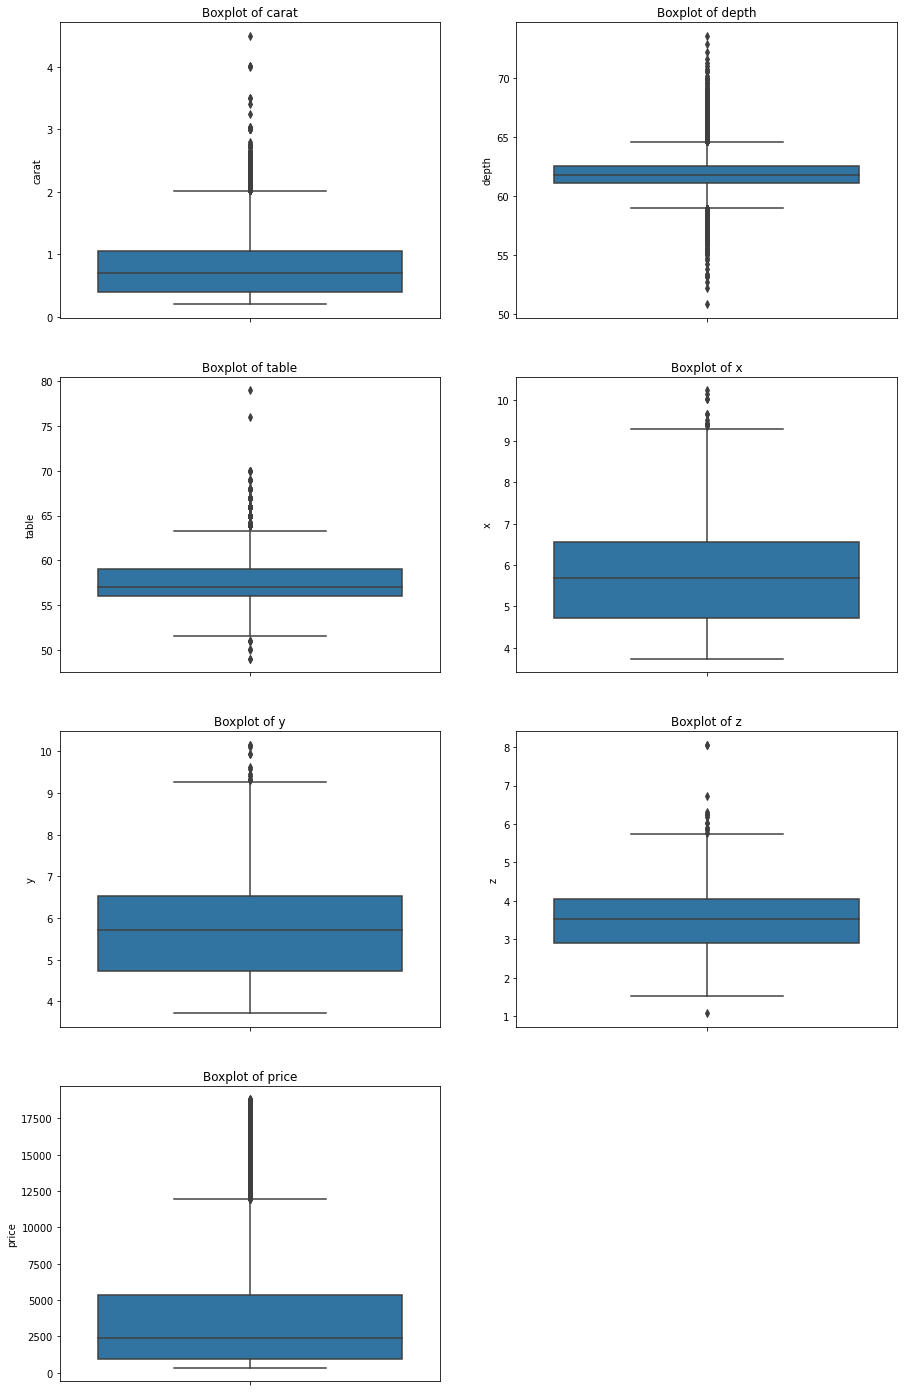

In [39]:
plt.figure(figsize=(15,25))
j=1
for i in cz[num].columns:
    plt.subplot(4,2,j)
    sns.boxplot(y=cz[i]);
    plt.title('Boxplot of '+i)
    j=j+1

In [40]:
q1=cz[num].quantile(0.25)
q3=cz[num].quantile(0.75)
iqr=q3-q1
ur=q3+1.5*iqr
lr=q1-1.5*iqr
a=pd.DataFrame(cz[num][(cz[num]<lr)|(cz[num]>ur)].count().sort_values(ascending=False),columns=['No. of Outliers'])
a['Percentage of Outliers']=a['No. of Outliers']/cz.shape[0]*100
a = a.rename_axis(index='Feature')
round(a,1)

,No. of Outliers,Percentage of Outliers
Feature,,
price,1778,6.6
depth,1413,5.2
carat,657,2.4
table,318,1.2
z,14,0.1
y,12,0.0
x,12,0.0


In [41]:
for i in cz[num].columns:
    q1=cz[i].quantile(0.25)
    q3=cz[i].quantile(0.75)
    iqr=q3-q1
    ur=q3+1.5*iqr
    lr=q1-1.5*iqr
    cz[i]=np.where(cz[i]>ur,ur,cz[i])
    cz[i]=np.where(cz[i]<lr,lr,cz[i])

In [42]:
q1=cz[num].quantile(0.25)
q3=cz[num].quantile(0.75)
iqr=q3-q1
ur=q3+1.5*iqr
lr=q1-1.5*iqr
c1=pd.DataFrame(cz[num][(cz[num]<lr)|(cz[num]>ur)].count().sort_values(ascending=False),columns=['No. of Outliers'])
c1['Percentage of Outliers']=c1['No. of Outliers']/cz.shape[0]*100
c1 = c1.rename_axis(index='Feature')
round(c1,1)

,No. of Outliers,Percentage of Outliers
Feature,,
price,0,0.0
z,0,0.0
y,0,0.0
x,0,0.0
table,0,0.0
depth,0,0.0
carat,0,0.0


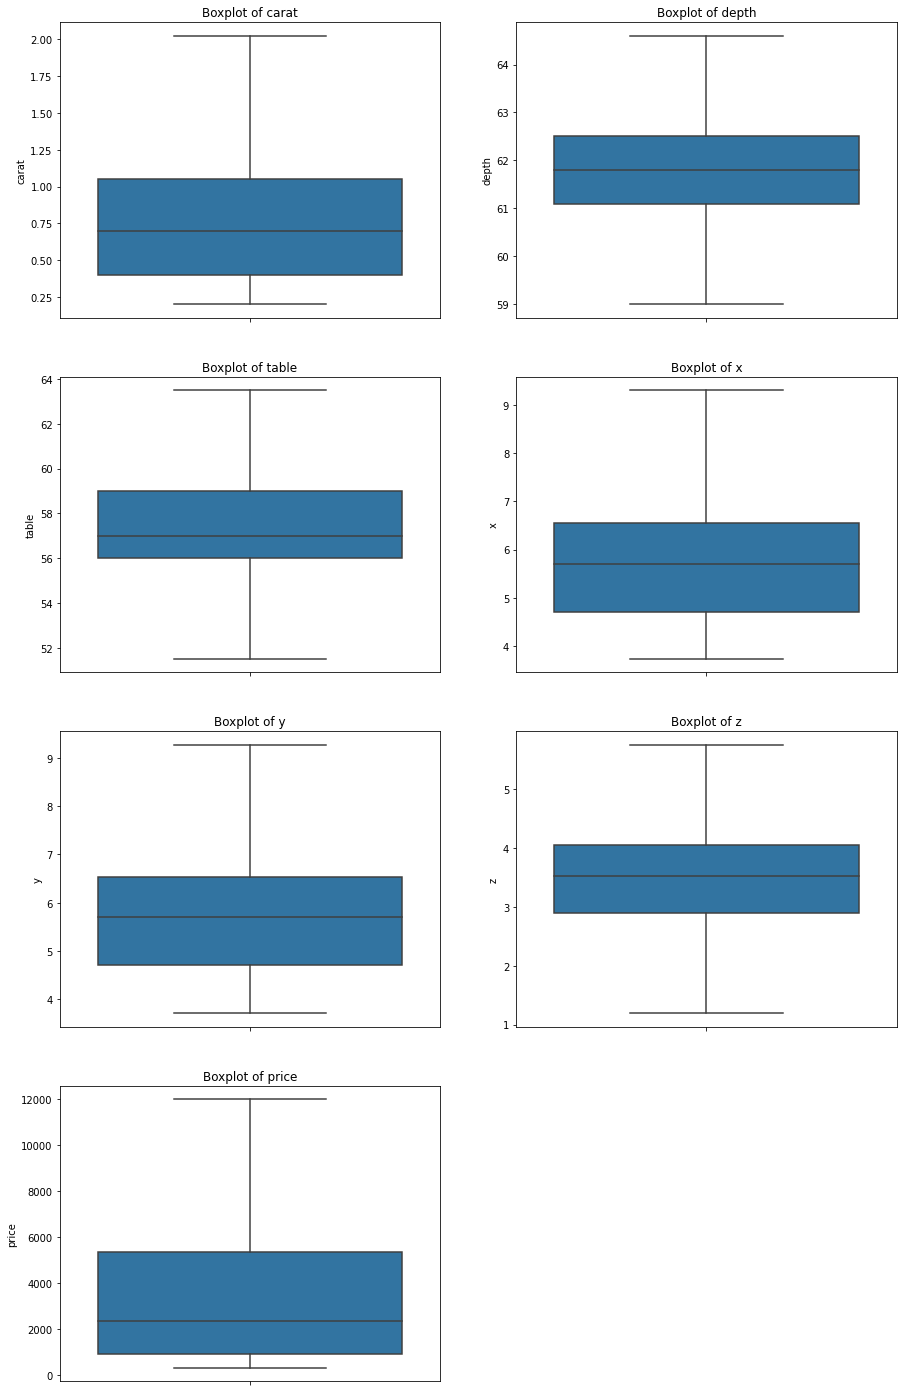

In [43]:
plt.figure(figsize=(15,25))
j=1
for i in cz[num].columns:
    plt.subplot(4,2,j)
    sns.boxplot(y=cz[i]);
    plt.title('Boxplot of '+i)
    j=j+1

# Checking for the possibility of combining the sub levels of ordinal variables

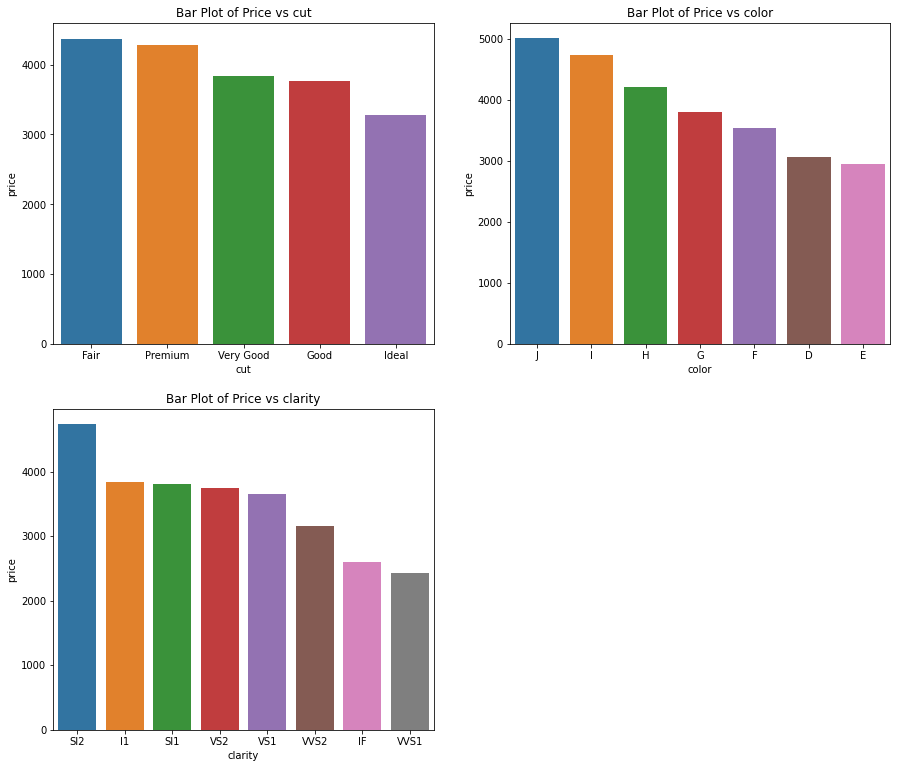

In [44]:
plt.figure(figsize=(15,13))
j=1
for i in cz[cat].columns:
    if cz[i].dtype=='object':
        plt.subplot(2,2,j)
        d=cz.groupby(i).mean().sort_values(by='price',ascending=False)
        sns.barplot(y=cz.price,x=cz[i],order=d.index,ci=False);
        plt.title('Bar Plot of Price vs '+i)
        j=j+1

In [45]:
df=cz.copy()

In [46]:
df.cut=df.cut.replace('Good','Very Good')

In [47]:
df.color=df.color.replace(['D','E','F','G','H','I','J'],['DE','DE','FG','FG','H','IJ','IJ'])

In [48]:
df.clarity=df.clarity.replace(['IF','VVS1'],'IF-VVS1')

In [49]:
df.clarity=df.clarity.replace(['VS1', 'VS2','SI1'],'VS1-VS2-SI1')

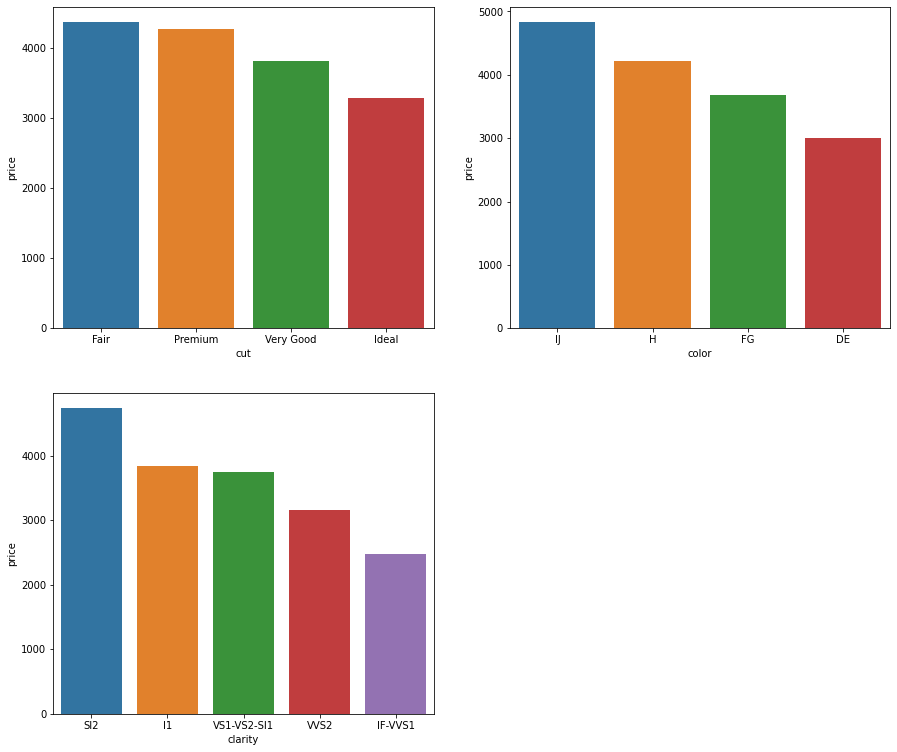

In [50]:
plt.figure(figsize=(15,13))
j=1
for i in df[cat].columns:
    if df[i].dtype=='object':
        plt.subplot(2,2,j)
        c=df.groupby(i).mean().sort_values(by='price',ascending=False)
        sns.barplot(y=df.price,x=df[i],order=c.index,ci=False);
        j=j+1

### Q1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [51]:
df.cut=df.cut.replace(['Ideal','Premium','Very Good','Fair'],[4,3,2,1])

In [52]:
df.color=df.color.replace(['DE','FG','H','IJ'],[1,2,3,4])

In [53]:
df.clarity=df.clarity.replace(['IF-VVS1', 'VVS2', 'VS1-VS2-SI1','SI2','I1'],[1,2,3,4,5])

In [54]:
for i in df[cat].columns:
    print('Feature: ', i)
    print(df[i].unique())
    print('\n')

Feature:  cut
[4 3 2 1]


Feature:  color
[1 2 3 4]


Feature:  clarity
[3 1 2 4 5]




In [55]:
pd.DataFrame(df.dtypes,columns=['Data Type']).rename_axis(index='Feature').T

Feature,carat,cut,color,clarity,depth,table,x,y,z,price
Data Type,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64


# Model 1 - Linear Regression by Including All Features

### Splitting the Dataset into Predictors and Target Variable

In [56]:
df.duplicated().sum()

10

In [57]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [58]:
df.duplicated().sum()

0

In [59]:
x=df.drop('price',axis=1)
y=df.price

In [60]:
x.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4,1,3,62.1,58.0,4.27,4.29,2.66
1,0.33,3,2,1,60.8,58.0,4.42,4.46,2.70
2,0.90,2,1,2,62.2,60.0,6.04,6.12,3.78
3,0.42,4,2,3,61.6,56.0,4.82,4.80,2.96
4,0.31,4,2,1,60.4,59.0,4.35,4.43,2.65


In [61]:
y.head()

0     499.0
1     984.0
2    6289.0
3    1082.0
4     779.0
Name: price, dtype: float64

### Split the data into Train and Test Sets

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30 , random_state=1)

In [64]:
xtrain.head()

,carat,cut,color,clarity,depth,table,x,y,z
2664,0.55,4,2,3,61.4,56.0,5.28,5.31,3.25
7769,0.72,4,1,3,61.1,56.0,5.78,5.81,3.54
9332,0.31,3,1,1,62.0,59.0,4.30,4.34,2.68
1024,1.66,4,4,3,61.0,55.0,7.67,7.64,4.67
3557,0.53,2,2,3,61.8,57.0,5.22,5.26,3.20


In [65]:
xtest.head()

,carat,cut,color,clarity,depth,table,x,y,z
18972,0.74,4,2,3,62.3,57.0,5.79,5.77,3.60
16142,0.57,4,2,3,62.5,54.2,5.29,5.31,3.31
19966,1.53,4,4,4,62.4,58.0,7.31,7.37,4.58
9331,0.32,4,1,3,61.5,56.0,4.44,4.41,2.72
23223,0.33,4,1,2,61.2,57.0,4.47,4.45,2.73


In [66]:
ytrain.head()

2664     1715.0
7769     3601.0
9332      789.0
1024    10691.0
3557     1648.0
Name: price, dtype: float64

In [67]:
ytest.head()

18972    3170.0
16142    1943.0
19966    7678.0
9331      972.0
23223    1114.0
Name: price, dtype: float64

In [68]:
print('Size of xtrain: ',xtrain.shape)
print('Size of xtest: ',xtest.shape)
print('Size of ytrain: ',ytrain.shape)
print('Size of ytest: ',ytest.shape)

Size of xtrain:  (18846, 9)
Size of xtest:  (8077, 9)
Size of ytrain:  (18846,)
Size of ytest:  (8077,)


## Linear Regression by Using Sci-kit learn library

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

### Model Evaluation Based on Training Dataset

In [71]:
ytrain.head()

2664     1715.0
7769     3601.0
9332      789.0
1024    10691.0
3557     1648.0
Name: price, dtype: float64

In [72]:
ytrain_predict=lr.predict(xtrain)
ytrain_predict.round(1)[0:5]

array([1952.5, 3707.9, 1996.3, 9968.8, 1553.3])

#### Coefficients

In [73]:
e=pd.DataFrame(lr.coef_,index=[xtrain.columns],columns=['Coefficients_Model1']).rename_axis(index='Independent Variable')
e.sort_values(by='Coefficients_Model1',ascending=False,key=abs).round(1).T

Independent Variable,carat,y,x,z,clarity,color,cut,table,depth
Coefficients_Model1,9009.2,1396.7,-1302.9,-897.8,-769.5,-438.1,122.6,-27.9,2.6


#### Intercept

In [74]:
intercept=lr.intercept_
intercept

3479.7026490982576

#### Score

In [75]:
score_train=lr.score(xtrain,ytrain)
score_train

0.9259726122117193

#### Mean Squared Error

In [76]:
mse_train=np.mean((ytrain-ytrain_predict)**2)
mse_train

891444.938387748

#### Root Mean Squared Error

In [77]:
rmse_train=np.sqrt(mse_train)
rmse_train

944.1636184410772

#### Mean Absolute Percentage Error

In [78]:
mape_train=np.mean(abs(ytrain-ytrain_predict)/ytrain)*100
mape_train

37.37175118118318

### Model Evaluation Based on Testing Dataset

In [79]:
ytest.head()

18972    3170.0
16142    1943.0
19966    7678.0
9331      972.0
23223    1114.0
Name: price, dtype: float64

In [80]:
ytest_predict=lr.predict(xtest)
ytest_predict.round(1)[0:5]

array([3302.3, 2118.9, 8120.6,  632. , 1470.7])

#### Score

In [81]:
score_test=lr.score(xtest,ytest)
score_test

0.9252168302927544

#### Mean Squared Error

In [82]:
mse_test=np.mean((ytest-ytest_predict)**2)
mse_test

893480.1215345929

#### Root Mean Squared Error

In [83]:
rmse_test=np.sqrt(mse_test)
rmse_test

945.2407743715846

#### Mean Absolute Percentage Error

In [84]:
mape_test=np.mean(abs(ytest-ytest_predict)/ytest)*100
mape_test

37.972619468251125

## Linear Regression by Using Statsmodel

In [85]:
dftrain=pd.concat([xtrain,ytrain],axis=1)
dftrain.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
2664,0.55,4,2,3,61.4,56.0,5.28,5.31,3.25,1715.0
7769,0.72,4,1,3,61.1,56.0,5.78,5.81,3.54,3601.0
9332,0.31,3,1,1,62.0,59.0,4.30,4.34,2.68,789.0
1024,1.66,4,4,3,61.0,55.0,7.67,7.64,4.67,10691.0
3557,0.53,2,2,3,61.8,57.0,5.22,5.26,3.20,1648.0


In [86]:
dftrain.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [87]:
from statsmodels.formula.api import ols
lm = ols(formula= 'price~carat+cut+color+clarity+depth+table+x+y+z',data = dftrain).fit()

In [88]:
adj_Rsquare=lm.rsquared_adj
adj_Rsquare

0.925937241300162

In [89]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 2.618e+04
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:52:38   Log-Likelihood:            -1.5584e+05
No. Observations:               18846   AIC:                         3.117e+05
Df Residuals:                   18836   BIC:                         3.118e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3479.7026    835.576      4.164      0.0

### Performance Metrics for Model 1

In [90]:
pd.DataFrame({'Train_Model1':[score_train,mse_train,rmse_train,mape_train],
            'Test_Model1':[score_test,mse_test,rmse_test,mape_test]},
            index=['Score or Rsquare','MSE','RMSE','MAPE']).T.round(2)

,Score or Rsquare,MSE,RMSE,MAPE
Train_Model1,0.93,891444.94,944.16,37.37
Test_Model1,0.93,893480.12,945.24,37.97


### Variance Inflation Factor for Model 1

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
VIF=[]
for i in range(x.shape[1]):
    vif=variance_inflation_factor(x.values,i)
    VIF.append(vif)

In [93]:
g=pd.DataFrame(VIF,index=x.columns,columns=['VIF_Model1']).rename_axis(index='Predictor')
g.sort_values(by='VIF_Model1',ascending=False).round(1).T

Predictor,x,y,z,depth,table,carat,cut,clarity,color
VIF_Model1,10671.2,9362.9,3013.6,1188.3,867.0,121.6,15.6,15.5,6.0


# Model 2 - Removing Depth Feature and Verifying the Performance of the Model

In [94]:
df2=df.drop('depth',axis=1)

In [95]:
df2.duplicated().sum()

4

In [96]:
df2.drop_duplicates(inplace=True,ignore_index=True)

In [97]:
df2.head()

,carat,cut,color,clarity,table,x,y,z,price
0,0.30,4,1,3,58.0,4.27,4.29,2.66,499.0
1,0.33,3,2,1,58.0,4.42,4.46,2.70,984.0
2,0.90,2,1,2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4,2,3,56.0,4.82,4.80,2.96,1082.0
4,0.31,4,2,1,59.0,4.35,4.43,2.65,779.0


In [98]:
df2.shape

(26919, 9)

In [99]:
x2=df2.drop('price',axis=1)
y2=df2.price

In [100]:
xtrain2, xtest2, ytrain2, ytest2= train_test_split(x2, y2,test_size=0.30 , random_state=1)

In [101]:
print('xtrain2 size: ',xtrain2.shape)
print('xtest2 size: ',xtest2.shape)
print('ytrain2 size: ',ytrain2.shape)
print('ytest2 size: ',ytest2.shape)

xtrain2 size:  (18843, 8)
xtest2 size:  (8076, 8)
ytrain2 size:  (18843,)
ytest2 size:  (8076,)


In [102]:
xtrain2.head()

,carat,cut,color,clarity,table,x,y,z
1024,1.66,4,4,3,55.0,7.67,7.64,4.67
3557,0.53,2,2,3,57.0,5.22,5.26,3.20
26368,0.54,4,1,3,55.0,5.24,5.21,3.25
19219,1.26,4,3,4,55.0,6.90,6.97,4.29
21347,0.90,2,2,4,60.0,6.22,6.32,3.77


In [103]:
xtest2.head()

,carat,cut,color,clarity,table,x,y,z
2491,1.58,3,2,3,61.0,7.48,7.45,4.58
25266,0.74,4,3,3,56.0,5.77,5.83,3.60
20028,0.70,2,2,3,57.0,5.64,5.71,3.52
14864,1.21,3,4,3,57.0,6.84,6.76,4.23
19349,0.24,2,2,2,56.0,4.01,4.04,2.48


In [104]:
lr2=LinearRegression()
lr2.fit(xtrain2,ytrain2)

LinearRegression()

#### Coefficients

In [105]:
f=pd.DataFrame(lr2.coef_,index=[xtrain2.columns],
             columns=['Coefficients_Model2']).rename_axis(index='Independent Variable')

In [106]:
f.sort_values(by='Coefficients_Model2',ascending=False,key=abs).round(1).T

Independent Variable,carat,y,x,clarity,z,color,cut,table
Coefficients_Model2,8957.2,1366.1,-1359.4,-758.1,-744.8,-430.0,121.6,-25.4


#### Intercept

In [107]:
intercept2=lr2.intercept_
intercept2

3435.5677610199705

### Model Evaluation Based on Training Dataset

In [108]:
ytrain_predict2=lr2.predict(xtrain2)

#### Score

In [109]:
score_train2=lr2.score(xtrain2,ytrain2)
score_train2

0.9260736497134134

#### Mean Squared Error

In [110]:
mse_train2=np.mean((ytrain2-ytrain_predict2)**2)
mse_train2

886307.6019099586

#### Root Mean Squared Error

In [111]:
rmse_train2=np.sqrt(mse_train2)
rmse_train2

941.4391121628412

#### Mean Absolute Percentage Error

In [112]:
mape_train2=np.mean(abs(ytrain2-ytrain_predict2)/ytrain2)*100
mape_train2

37.076561823220864

### Model Evaluation Based on Testing Dataset

In [113]:
ytest_predict2=lr2.predict(xtest2)

#### Score

In [114]:
score_test2=lr2.score(xtest2,ytest2)
score_test2

0.9249340061569986

#### Mean Squared Error

In [115]:
mse_test2=np.mean((ytest2-ytest_predict2)**2)
mse_test2

905786.4943543378

#### Root Mean Squared Error

In [116]:
rmse_test2=np.sqrt(mse_test2)
rmse_test2

951.7281620054845

#### Mean Absolute Percentage Error

In [117]:
mape_test2=np.mean(abs(ytest2-ytest_predict2)/ytest2)*100
mape_test2

36.88437714585383

### Linear Regression by Using Statsmodel

In [118]:
dftrain2=pd.concat([xtrain2,ytrain2],axis=1)
dftrain2.head()

,carat,cut,color,clarity,table,x,y,z,price
1024,1.66,4,4,3,55.0,7.67,7.64,4.67,10691.0
3557,0.53,2,2,3,57.0,5.22,5.26,3.20,1648.0
26368,0.54,4,1,3,55.0,5.24,5.21,3.25,1847.0
19219,1.26,4,3,4,55.0,6.90,6.97,4.29,6239.0
21347,0.90,2,2,4,60.0,6.22,6.32,3.77,3114.0


In [119]:
dftrain2.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [120]:
from statsmodels.formula.api import ols
lm2 = ols(formula= 'price~carat+cut+color+clarity+table+x+y+z',data = dftrain2).fit()

In [121]:
adj_Rsquare2=lm2.rsquared_adj
adj_Rsquare2

0.9260422484814769

In [122]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 2.949e+04
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:52:43   Log-Likelihood:            -1.5576e+05
No. Observations:               18843   AIC:                         3.115e+05
Df Residuals:                   18834   BIC:                         3.116e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3435.5678    273.831     12.546      0.0

### Performance Metrics for Model 2

In [123]:
pd.DataFrame({'Train_Model2':[score_train2,mse_train2,rmse_train2,mape_train2],
            'Test_Model2':[score_test2,mse_test2,rmse_test2,mape_test2]},
            index=['Score or Rsquare','MSE','RMSE','MAPE']).T.round(2)

,Score or Rsquare,MSE,RMSE,MAPE
Train_Model2,0.93,886307.60,941.44,37.08
Test_Model2,0.92,905786.49,951.73,36.88


### Variance Inflation Factor for Model 2

In [124]:
VIF2=[]
for i in range(x2.shape[1]):
    vif2=variance_inflation_factor(x2.values,i)
    VIF2.append(vif2)

In [125]:
h=pd.DataFrame(VIF2,index=x2.columns,columns=['VIF_Model2']).rename_axis(index='Predictor')
h.sort_values(by='VIF_Model2',ascending=False).round(1).T

Predictor,x,y,z,table,carat,clarity,cut,color
VIF_Model2,10219.1,9335.7,1494.7,270.3,98.0,15.5,12.5,6.0


# Model 3 - Removing x, y, z, Depth, Table Features and Verifying the Performance of the Model

In [126]:
df3=df.drop(['x','y','z','depth','table'],axis=1)

In [127]:
df3.duplicated().sum()

7089

In [128]:
df3.drop_duplicates(inplace=True,ignore_index=True)

In [129]:
df3.head()

,carat,cut,color,clarity,price
0,0.30,4,1,3,499.0
1,0.33,3,2,1,984.0
2,0.90,2,1,2,6289.0
3,0.42,4,2,3,1082.0
4,0.31,4,2,1,779.0


In [130]:
df3.shape

(19834, 5)

In [131]:
x3=df3.drop('price',axis=1)
y3=df3.price

In [132]:
xtrain3, xtest3, ytrain3, ytest3= train_test_split(x3, y3,test_size=0.30 , random_state=1)

In [133]:
print('xtrain3 size: ',xtrain3.shape)
print('xtest3 size: ',xtest3.shape)
print('ytrain3 size: ',ytrain3.shape)
print('ytest3 size: ',ytest3.shape)

xtrain3 size:  (13883, 4)
xtest3 size:  (5951, 4)
ytrain3 size:  (13883,)
ytest3 size:  (5951,)


In [134]:
xtrain3.head()

,carat,cut,color,clarity
11775,0.70,3,2,3
7438,0.73,2,3,3
12524,1.14,2,2,4
18987,0.93,4,4,3
8563,1.18,4,3,3


In [135]:
xtest3.head()

,carat,cut,color,clarity
19563,0.72,4,2,3
15770,1.51,3,3,3
4,0.31,4,2,1
12612,1.07,2,3,3
6463,0.38,4,2,2


In [136]:
lr3=LinearRegression()
lr3.fit(xtrain3,ytrain3)

LinearRegression()

#### Coefficients

In [137]:
f1=pd.DataFrame(lr3.coef_,index=[xtrain3.columns],
             columns=['Coefficients_Model3']).rename_axis(index='Independent Variable')

In [138]:
f1.sort_values(by='Coefficients_Model3',ascending=False,key=abs).round(1).T

Independent Variable,carat,clarity,color,cut
Coefficients_Model3,8025.1,-887.6,-450.8,158.4


#### Intercept

In [139]:
intercept3=lr3.intercept_
intercept3

379.0639502140393

### Model Evaluation Based on Training Dataset

In [140]:
ytrain_predict3=lr3.predict(xtrain3)

#### Score

In [141]:
score_train3=lr3.score(xtrain3,ytrain3)
score_train3

0.9004264779828931

#### Mean Squared Error

In [142]:
mse_train3=np.mean((ytrain3-ytrain_predict3)**2)
mse_train3

962477.2170853928

#### Root Mean Squared Error

In [143]:
rmse_train3=np.sqrt(mse_train3)
rmse_train3

981.0592322002749

#### Mean Absolute Percentage Error

In [144]:
mape_train3=np.mean(abs(ytrain3-ytrain_predict3)/ytrain3)*100
mape_train3

37.590125380221615

### Model Evaluation Based on Testing Dataset

In [145]:
ytest_predict3=lr3.predict(xtest3)

#### Score

In [146]:
score_test3=lr3.score(xtest3,ytest3)
score_test3

0.9013655398720473

#### Mean Squared Error

In [147]:
mse_test3=np.mean((ytest3-ytest_predict3)**2)
mse_test3

970028.3714069088

#### Root Mean Squared Error

In [148]:
rmse_test3=np.sqrt(mse_test3)
rmse_test3

984.9001834738934

#### Mean Absolute Percentage Error

In [149]:
mape_test3=np.mean(abs(ytest3-ytest_predict3)/ytest3)*100
mape_test3

37.615775495024145

### Linear Regression by Using Statsmodel

In [150]:
dftrain3=pd.concat([xtrain3,ytrain3],axis=1)
dftrain3.head()

,carat,cut,color,clarity,price
11775,0.70,3,2,3,2239.0
7438,0.73,2,3,3,2916.0
12524,1.14,2,2,4,5033.0
18987,0.93,4,4,3,2917.0
8563,1.18,4,3,3,6013.0


In [151]:
dftrain3.columns

Index(['carat', 'cut', 'color', 'clarity', 'price'], dtype='object')

In [152]:
from statsmodels.formula.api import ols
lm3 = ols(formula= 'price~carat+cut+color+clarity',data = dftrain3).fit()

In [153]:
adj_Rsquare3=lm3.rsquared_adj
adj_Rsquare3

0.900397778308007

In [154]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 3.137e+04
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:52:49   Log-Likelihood:            -1.1533e+05
No. Observations:               13883   AIC:                         2.307e+05
Df Residuals:                   13878   BIC:                         2.307e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    379.0640     46.834      8.094      0.0

### Performance Metrics for Model 2

In [155]:
pd.DataFrame({'Train_Model3':[score_train3,mse_train3,rmse_train3,mape_train3],
            'Test_Model3':[score_test3,mse_test3,rmse_test3,mape_test3]},
            index=['Score or Rsquare','MSE','RMSE','MAPE']).T.round(2)

,Score or Rsquare,MSE,RMSE,MAPE
Train_Model3,0.9,962477.22,981.06,37.59
Test_Model3,0.9,970028.37,984.90,37.62


### Variance Inflation Factor for Model 3

In [156]:
VIF3=[]
for i in range(x3.shape[1]):
    vif3=variance_inflation_factor(x3.values,i)
    VIF3.append(vif3)

In [157]:
r=pd.DataFrame(VIF3,index=x3.columns,columns=['VIF_Model3']).rename_axis(index='Predictor')
r.sort_values(by='VIF_Model3',ascending=False).round(1).T

Predictor,clarity,cut,carat,color
VIF_Model3,9.1,6.3,6.2,5.2


## Comparison of Performance Metrics on Train Dataset

In [158]:
pd.DataFrame({'Train_Model1':[score_train,mse_train,rmse_train,mape_train,adj_Rsquare,intercept],
            'Train_Model2':[score_train2,mse_train2,rmse_train2,mape_train2,adj_Rsquare2,intercept2],
            'Train_Model3':[score_train3,mse_train3,rmse_train3,mape_train3,adj_Rsquare3,intercept3],},
            index=['Score or Rsquare','MSE','RMSE','MAPE','Adjusted RSquare','Intercept']).T.round(2)

,Score or Rsquare,MSE,RMSE,MAPE,Adjusted RSquare,Intercept
Train_Model1,0.93,891444.94,944.16,37.37,0.93,3479.70
Train_Model2,0.93,886307.60,941.44,37.08,0.93,3435.57
Train_Model3,0.90,962477.22,981.06,37.59,0.90,379.06


## Comparison of Performance Metrics on Test Dataset

In [159]:
pd.DataFrame({'Test_Model1':[score_test,mse_test,rmse_test,mape_test],
            'Test_Model2':[score_test2,mse_test2,rmse_test2,mape_test2],
            'Test_Model3':[score_test3,mse_test3,rmse_test3,mape_test3]},
    index=['Score or Rsquare','MSE','RMSE','MAPE']).T.round(2)

,Score or Rsquare,MSE,RMSE,MAPE
Test_Model1,0.93,893480.12,945.24,37.97
Test_Model2,0.92,905786.49,951.73,36.88
Test_Model3,0.90,970028.37,984.90,37.62


## Comparison of Variance Inflation Factor

In [160]:
pd.concat([g,h,r],axis=1).sort_values(by='VIF_Model1',ascending=True).round(1)

,VIF_Model1,VIF_Model2,VIF_Model3
color,6.0,6.0,5.2
clarity,15.5,15.5,9.1
cut,15.6,12.5,6.3
carat,121.6,98.0,6.2
table,867.0,270.3,NaN
depth,1188.3,NaN,NaN
z,3013.6,1494.7,NaN
y,9362.9,9335.7,NaN
x,10671.2,10219.1,NaN


## Comparison of Coefficients

In [161]:
pd.concat([e,f,f1],axis=1).sort_values(by='Coefficients_Model1',ascending=False,key=abs).round(1)

,Coefficients_Model1,Coefficients_Model2,Coefficients_Model3
Independent Variable,,,
carat,9009.2,8957.2,8025.1
y,1396.7,1366.1,NaN
x,-1302.9,-1359.4,NaN
z,-897.8,-744.8,NaN
clarity,-769.5,-758.1,-887.6
color,-438.1,-430.0,-450.8
cut,122.6,121.6,158.4
table,-27.9,-25.4,NaN
depth,2.6,NaN,NaN


# Building Regression Models in Random Forest and Artificial Neural Networks

## Building Random Forest Model

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [163]:
rfm=RandomForestRegressor(oob_score=True,random_state=1)

In [164]:
from sklearn.model_selection import GridSearchCV

In [165]:
hyper_param_rf={
                'n_estimators': [201], # Optimized
                'max_features': [7], # Optimized
                'max_depth': [12], # Optimized
                'min_samples_split':[10], #In decreasing trend
                'min_samples_leaf':[5]}  #In decreasing trend

In [166]:
gscv_rf=GridSearchCV(estimator=rfm,param_grid=hyper_param_rf,cv=5)

In [167]:
gscv_rf.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(oob_score=True, random_state=1),
             param_grid={'max_depth': [12], 'max_features': [7],
                         'min_samples_leaf': [5], 'min_samples_split': [10],
                         'n_estimators': [201]})

In [168]:
gscv_rf.best_params_

{'max_depth': 12,
 'max_features': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 201}

In [169]:
gsb_rf=gscv_rf.best_estimator_

In [170]:
p=pd.DataFrame(gsb_rf.feature_importances_,index=xtrain.columns,columns=['Importance'])
p = p.rename_axis(index='Feature')
p.sort_values('Importance',ascending=False).round(3)

,Importance
Feature,
carat,0.597
y,0.234
x,0.087
clarity,0.054
color,0.021
z,0.003
depth,0.001
cut,0.001
table,0.001


## Predicting on Training Dataset

In [171]:
ytrain_pred_rf=gsb_rf.predict(xtrain)

In [172]:
score_train_rf=gsb_rf.score(xtrain,ytrain)
score_train_rf

0.9855198430393881

#### Mean Squared Error

In [173]:
mse_train_rf=np.mean((ytrain-ytrain_pred_rf)**2)
mse_train_rf

174371.44569406597

#### Root Mean Squared Error

In [174]:
rmse_train_rf=np.sqrt(mse_train_rf)
rmse_train_rf

417.57807137595955

#### Mean Absolute Percentage Error

In [175]:
mape_train_rf=np.mean(abs(ytrain-ytrain_pred_rf)/ytrain)*100
mape_train_rf

7.96611764871554

## Predicting on Test Dataset

In [176]:
ytest_pred_rf=gsb_rf.predict(xtest)

In [177]:
score_test_rf=gsb_rf.score(xtest,ytest)
score_test_rf

0.9757131604262972

#### Mean Squared Error

In [178]:
mse_test_rf=np.mean((ytest-ytest_pred_rf)**2)
mse_test_rf

290169.6793403075

#### Root Mean Squared Error

In [179]:
rmse_test_rf=np.sqrt(mse_test_rf)
rmse_test_rf

538.6740009878957

#### Mean Absolute Percentage Error

In [180]:
mape_test_rf=np.mean(abs(ytest-ytest_pred_rf)/ytest)*100
mape_test_rf

9.702253657778376

## Building Artificial Neural Network Model

In [181]:
from sklearn.preprocessing import StandardScaler

In [182]:
ss=StandardScaler()

In [183]:
xtrain_scaled=pd.DataFrame(data=ss.fit_transform(xtrain),columns=xtrain.columns,index=xtrain.index)
xtrain_scaled.head()

,carat,cut,color,clarity,depth,table,x,y,z
2664,-0.528279,1.068740,-0.151417,0.12131,-0.289293,-0.659103,-0.401672,-0.379609,-0.416314
7769,-0.159638,1.068740,-1.125347,0.12131,-0.534919,-0.659103,0.043123,0.068328,0.001546
9332,-1.048715,-0.027216,-1.125347,-2.25274,0.201960,0.731514,-1.273472,-1.248608,-1.237625
1024,1.878733,1.068740,1.796441,0.12131,-0.616795,-1.122643,1.724452,1.707779,1.629759
3557,-0.571649,-1.123171,-0.151417,0.12131,0.038209,-0.195564,-0.455048,-0.424403,-0.488359


In [184]:
xtest_scaled=pd.DataFrame(data=ss.transform(xtest),columns=xtest.columns,index=xtest.index)
xtest_scaled.head()

,carat,cut,color,clarity,depth,table,x,y,z
18972,-0.116268,1.06874,-0.151417,0.121310,0.447587,-0.195564,0.052019,0.032493,0.088000
16142,-0.484910,1.06874,-0.151417,0.121310,0.611338,-1.493474,-0.392776,-0.379609,-0.329860
19966,1.596830,1.06874,1.796441,1.308335,0.529462,0.267975,1.404199,1.465893,1.500078
9331,-1.027030,1.06874,-1.125347,0.121310,-0.207417,-0.659103,-1.148929,-1.185897,-1.179989
23223,-1.005345,1.06874,-1.125347,-1.065715,-0.453044,-0.195564,-1.122242,-1.150062,-1.165580


In [185]:
from sklearn.neural_network import MLPRegressor

In [186]:
annm=MLPRegressor(random_state=1)

In [187]:
#'solver' : ['lbfgs', 'sgd', 'adam']

In [208]:
hyper_param_ann={
    'hidden_layer_sizes': [25,50], #Optimized
    'max_iter': [100,250], #Optimized
    'solver' : ['lbfgs','adam']} 

In [209]:
gscv_ann=GridSearchCV(estimator=annm,param_grid=hyper_param_ann,cv=5)

In [210]:
gscv_ann.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=MLPRegressor(random_state=1),
             param_grid={'hidden_layer_sizes': [25, 50], 'max_iter': [100, 250],
                         'solver': ['lbfgs', 'adam']})

In [212]:
gscv_ann.best_params_

{'hidden_layer_sizes': 50, 'max_iter': 250, 'solver': 'lbfgs'}

In [213]:
gsb_ann=gscv_ann.best_estimator_

## Predicting on Training Dataset

In [214]:
ytrain_pred_ann=gsb_ann.predict(xtrain_scaled)

In [215]:
score_train_ann=gsb_ann.score(xtrain_scaled,ytrain)
score_train_ann

0.9775460355898861

#### Mean Squared Error

In [216]:
mse_train_ann=np.mean((ytrain-ytrain_pred_ann)**2)
mse_train_ann

270392.8035037839

#### Root Mean Squared Error

In [217]:
rmse_train_ann=np.sqrt(mse_train_ann)
rmse_train_ann

519.9930802460585

#### Mean Absolute Percentage Error

In [218]:
mape_train_ann=np.mean(abs(ytrain-ytrain_pred_ann)/ytrain)*100
mape_train_ann

11.354852198554084

## Predicting on Test Dataset

In [219]:
ytest_pred_ann=gsb_ann.predict(xtest_scaled)

In [220]:
score_test_ann=gsb_ann.score(xtest_scaled,ytest)
score_test_ann

0.9741277406511587

#### Mean Squared Error

In [221]:
mse_test_ann=np.mean((ytest-ytest_pred_ann)**2)
mse_test_ann

309111.65597648453

#### Root Mean Squared Error

In [222]:
rmse_test_ann=np.sqrt(mse_test_ann)
rmse_test_ann

555.978107461512

#### Mean Absolute Percentage Error

In [223]:
mape_test_ann=np.mean(abs(ytest-ytest_pred_ann)/ytest)*100
mape_test_ann

11.629436949483729

## Summary of Metrics

In [224]:
pd.DataFrame({'Train_LR':[score_train,mse_train,rmse_train,mape_train],
           'Train_RF':[score_train_rf,mse_train_rf,rmse_train_rf,mape_train_rf],
            'Train_ANN':[score_train_ann,mse_train_ann,rmse_train_ann,mape_train_ann],
            'Test_LR':[score_test,mse_test,rmse_test,mape_test],
            'Test_RF':[score_test_rf,mse_test_rf,rmse_test_rf,mape_test_rf],
            'Test_ANN':[score_test_ann,mse_test_ann,rmse_test_ann,mape_test_ann]},
    index=['Score or Rsquare','MSE','RMSE','MAPE']).T.round(2)

,Score or Rsquare,MSE,RMSE,MAPE
Train_LR,0.93,891444.94,944.16,37.37
Train_RF,0.99,174371.45,417.58,7.97
Train_ANN,0.98,270392.80,519.99,11.35
Test_LR,0.93,893480.12,945.24,37.97
Test_RF,0.98,290169.68,538.67,9.70
Test_ANN,0.97,309111.66,555.98,11.63


### Q1.4 Inference: Basis on these predictions, what are the business insights and recommendations. (Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.)

## PROBLEM 2: LOGISTIC REGRESSION and LDA

### Problem Statement 

* You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

### Q2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition. check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

### Loading the Dataset

In [268]:
hp = pd.read_csv("Holiday_Package.csv")

In [269]:
hp.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [270]:
hp.drop('Unnamed: 0',axis=1,inplace=True)

In [271]:
hp.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [272]:
hp.shape

(872, 7)

### Data Types of the Features

In [273]:
pd.DataFrame(hp.dtypes,columns=['Data Type']).rename_axis(index='Feature').T

Feature,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
Data Type,object,int64,int64,int64,int64,int64,object


In [274]:
numhp=['Salary','age']
numhp

['Salary', 'age']

In [275]:
cathp=hp.columns.drop(numhp)
cathp

Index(['Holliday_Package', 'educ', 'no_young_children', 'no_older_children',
       'foreign'],
      dtype='object')

## Description of the Dataset

### Continuous Numerical Features

In [276]:
hp[numhp].describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.2,23418.7,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,40.0,10.6,20.0,32.0,39.0,48.0,62.0


### Discrete Numerical and Categorical Features

In [277]:
hp[cathp].astype('object').describe()

,Holliday_Package,educ,no_young_children,no_older_children,foreign
count,872,872,872,872,872
unique,2,20,4,7,2
top,no,8,0,0,no
freq,471,157,665,393,656


## Exploratory Data Analysis

### Check Duplicated Observations

In [278]:
hp.duplicated().sum()

0

### Check Null Values

In [279]:
pd.DataFrame(hp.isnull().sum(),index=hp.columns,columns=['Number_of_Null_Values']).rename_axis(index='Feature').sort_values(by='Number_of_Null_Values',ascending=False).T

Feature,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
Number_of_Null_Values,0,0,0,0,0,0,0


## Checking for Anomalies

### Checking Value Counts in Discrete Numerical and Categorical Variables

In [285]:
for i in hp[cathp].columns:
    print('Feature: ', i)
    print(hp[i].value_counts())
    print('----------------------------------------------')

Feature:  Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64
----------------------------------------------
Feature:  educ
8     157
12    124
9     114
11    100
10     90
5      67
4      50
13     43
7      31
14     25
6      21
15     15
3      11
16     10
2       6
17      3
19      2
21      1
18      1
1       1
Name: educ, dtype: int64
----------------------------------------------
Feature:  no_young_children
0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64
----------------------------------------------
Feature:  no_older_children
0    393
2    208
1    198
3     55
4     14
6      2
5      2
Name: no_older_children, dtype: int64
----------------------------------------------
Feature:  foreign
no     656
yes    216
Name: foreign, dtype: int64
----------------------------------------------


### Checking Unique Entries in Discrete Numerical and Categorical Variables

In [286]:
for i in hp[cathp].columns:
    print('Feature: ', i)
    print(hp[i].unique())
    print('----------------------------')

Feature:  Holliday_Package
['no' 'yes']
----------------------------
Feature:  educ
[ 8  9 11 12 14 19 10 13 15  4 17  7 16  6  5 21  2 18  3  1]
----------------------------
Feature:  no_young_children
[1 0 2 3]
----------------------------
Feature:  no_older_children
[1 0 2 4 3 5 6]
----------------------------
Feature:  foreign
['no' 'yes']
----------------------------


### Checking Outliers in Continuous Numerical Features

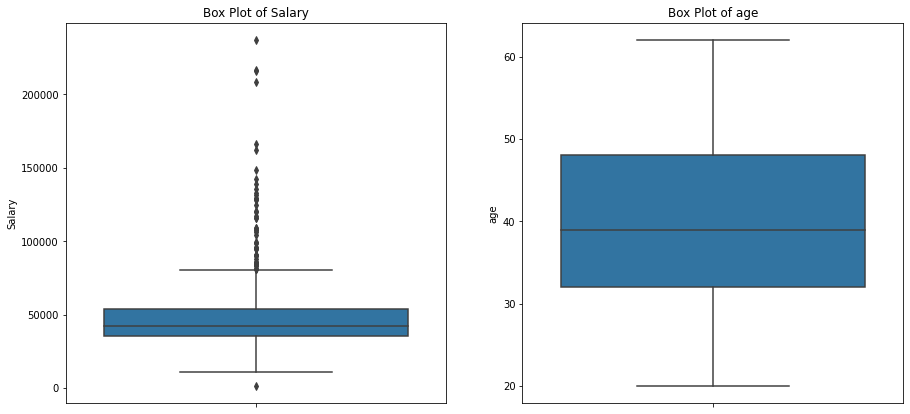

In [282]:
plt.figure(figsize=(15,7))
j=1
for i in hp[numhp].columns:
    plt.subplot(1,2,j)
    sns.boxplot(y=hp[i]);
    plt.title('Box Plot of '+i)
    j=j+1

In [283]:
q1=hp[numhp].quantile(0.25)
q3=hp[numhp].quantile(0.75)
iqr=q3-q1
ur=q3+1.5*iqr
lr=q1-1.5*iqr
m=pd.DataFrame(hp[numhp][(hp[numhp]<lr)|(hp[numhp]>ur)].count().sort_values(ascending=False),columns=['No. of Outliers'])
m['Percentage of Outliers']=m['No. of Outliers']/hp.shape[0]*100
m = m.rename_axis(index='Feature')
round(m,1)

,No. of Outliers,Percentage of Outliers
Feature,,
Salary,57,6.5
age,0,0.0


## Univariate Analysis

### Histogram and Boxplot of Continuous Numerical Features

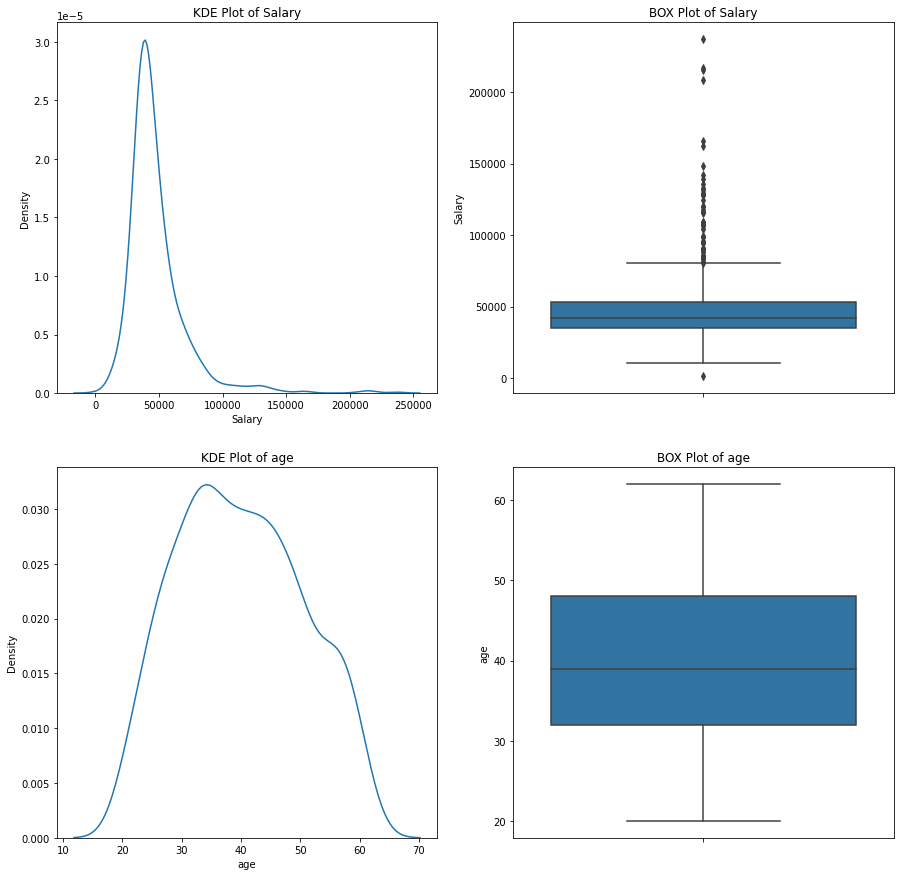

In [287]:
plt.figure(figsize=(15,15))
j=1
for i in hp[numhp].columns:
    plt.subplot(2,2,j)
    sns.kdeplot(x=hp[i]);
    plt.title('KDE Plot of '+i)
    k=j+1
    plt.subplot(2,2,k)
    sns.boxplot(y=hp[i]);
    plt.title('BOX Plot of '+i)
    j=k+1

### Skewness and Kurtosis

In [292]:
pd.DataFrame([hp[numhp].skew(),hp[numhp].kurtosis()],index=['Skewness','kurtosis']).rename_axis(index='Feature').T.round(1)

Feature,Skewness,kurtosis
Salary,3.1,15.9
age,0.1,-0.9


### Histogram and Boxplot of Numerical Features with Holliday_Package as Hue

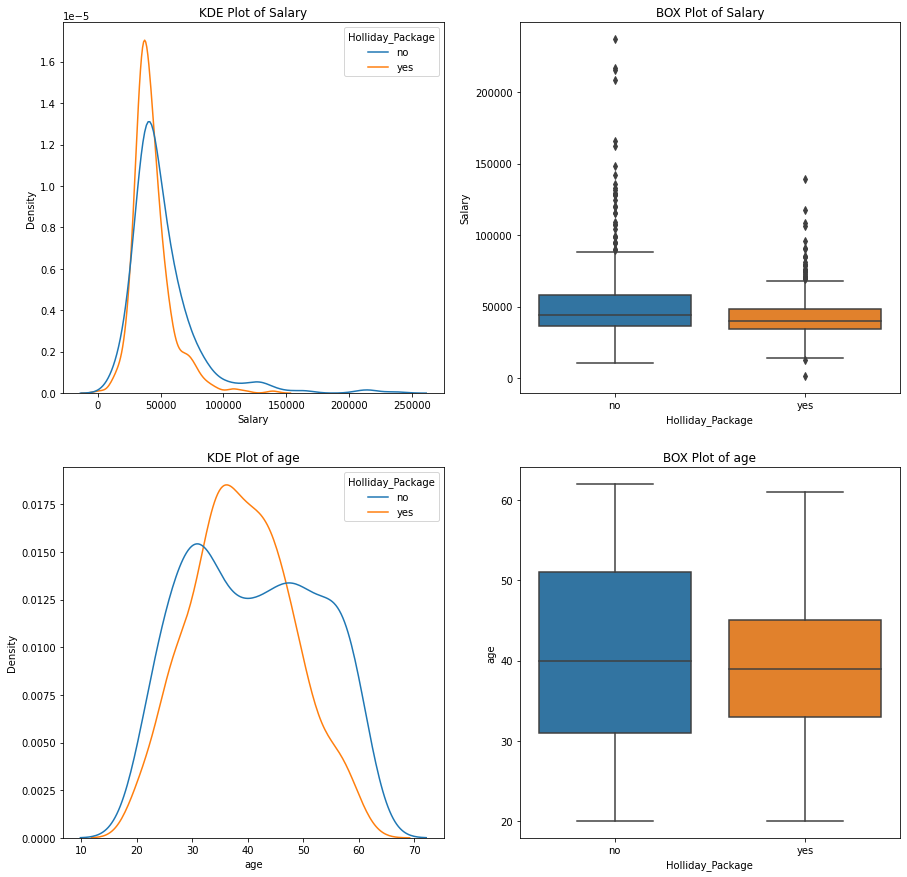

In [288]:
plt.figure(figsize=(15,15))
j=1
for i in hp[numhp].columns:
    plt.subplot(2,2,j)
    sns.kdeplot(x=hp[i],hue=hp.Holliday_Package);
    plt.title('KDE Plot of '+i)
    k=j+1
    plt.subplot(2,2,k)
    sns.boxplot(y=hp[i],x=hp.Holliday_Package);
    plt.title('BOX Plot of '+i)
    j=k+1

### Count Plots of Discrete Numerical and Categorical Features

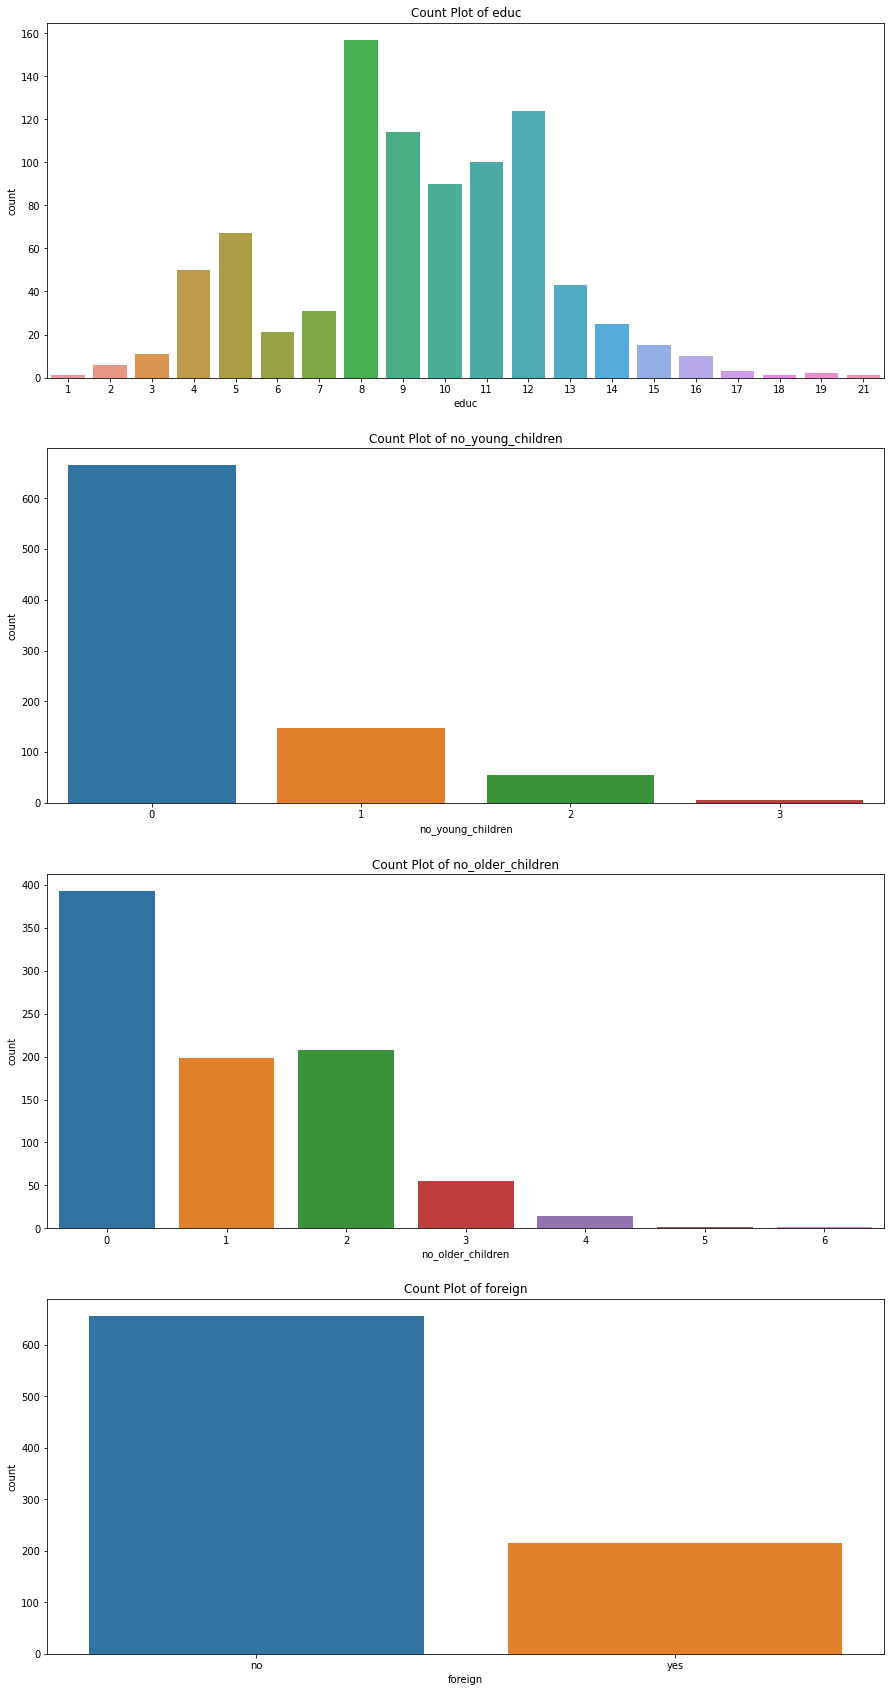

In [299]:
plt.figure(figsize=(15,30))
j=1
for i in hp[cathp].columns.drop('Holliday_Package'):
    plt.subplot(4,1,j)
    sns.countplot(hp[i]);
    plt.title('Count Plot of '+i)
    j=j+1

## Bivariate Analysis

### Pair Plot of Numerical Features

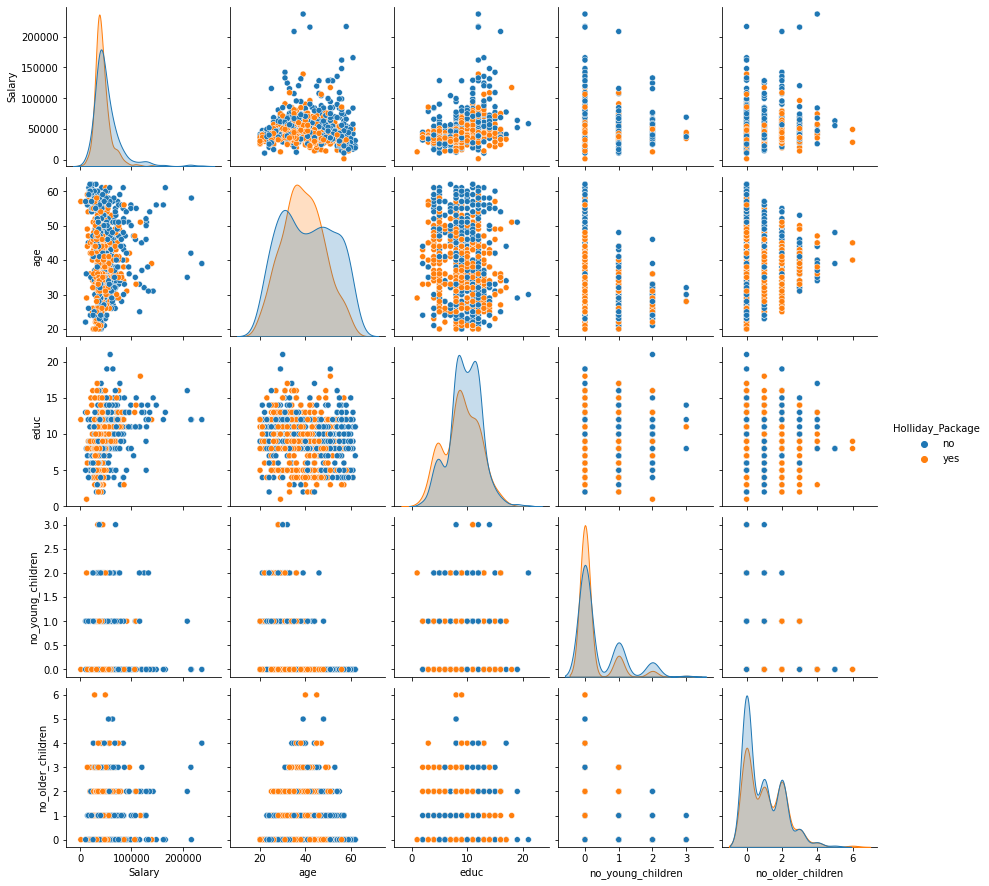

In [295]:
sns.pairplot(data=hp,hue='Holliday_Package');

### Heatmap of Numerical Features

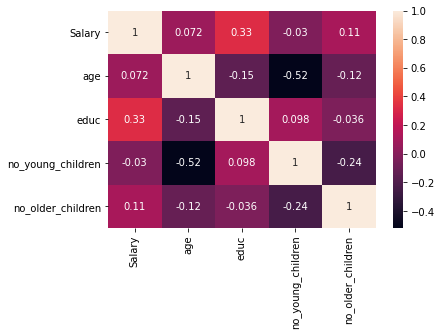

In [296]:
sns.heatmap(hp.corr(),annot=True);

### Box Plots of Continuous Numerical Features Vs Holliday Package

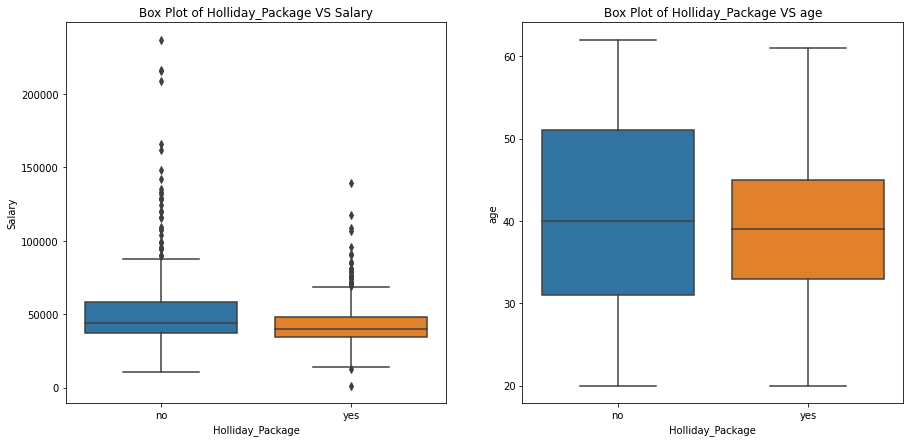

In [306]:
plt.figure(figsize=(15,7))
j=1
for i in hp[numhp].columns:
    plt.subplot(1,2,j)
    sns.boxplot(y=hp[i],x=hp.Holliday_Package);
    plt.title('Box Plot of Holliday_Package VS '+i)
    j=j+1

### Count Plots of Discrete Numerical and Categorical Features with Holliday Package as Hue

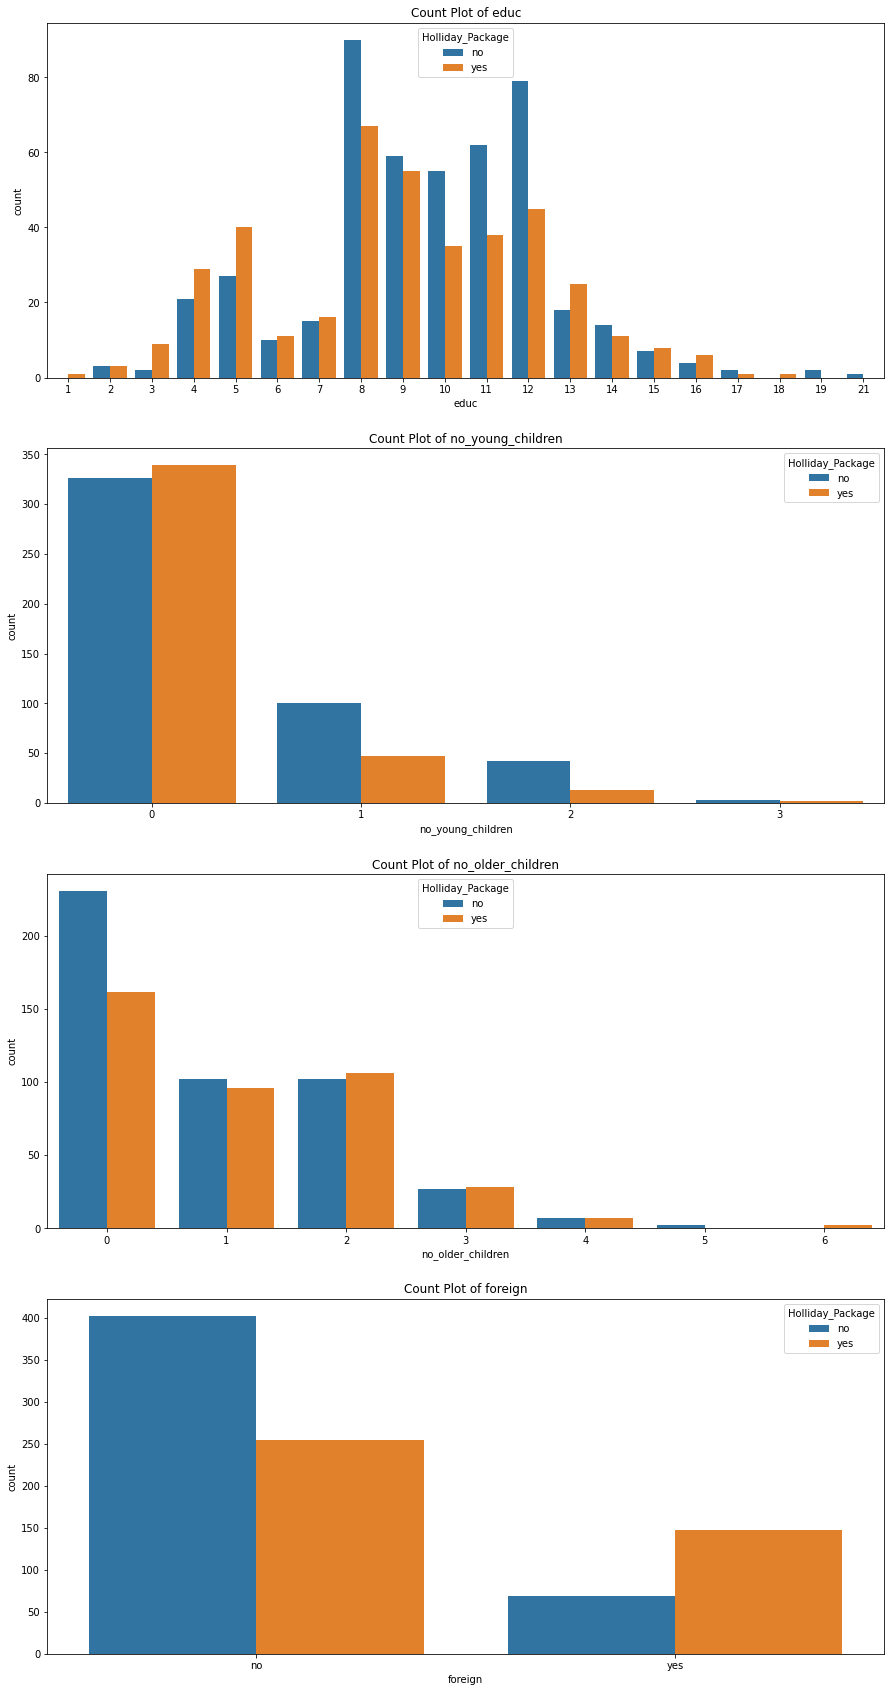

In [310]:
plt.figure(figsize=(15,30))
j=1
for i in hp[cathp].columns.drop('Holliday_Package'):
    plt.subplot(4,1,j)
    sns.countplot(hp[i],hue=hp.Holliday_Package);
    plt.title('Count Plot of '+i)
    j=j+1

### Check Distribution of Classes in Target Column

In [311]:
hp.Holliday_Package.value_counts(normalize=True).round(3)*100

no     54.0
yes    46.0
Name: Holliday_Package, dtype: float64

### Q2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

### Splitting the Dataset into Predictors and Target Variable

In [312]:
xhp=pd.get_dummies(hp.drop('Holliday_Package',axis=1),drop_first=True)
yhp=hp.Holliday_Package

In [313]:
xhp.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,48412,30,8,1,1,0
1,37207,45,8,0,1,0
2,58022,46,9,0,0,0
3,66503,31,11,2,0,0
4,66734,44,12,0,2,0


In [314]:
yhp.head()

0     no
1    yes
2     no
3     no
4     no
Name: Holliday_Package, dtype: object

In [315]:
yhp=yhp.replace(['yes','no'],[1,0])

In [316]:
yhp.head()

0    0
1    1
2    0
3    0
4    0
Name: Holliday_Package, dtype: int64

### Splitting the Dataset into Train and Test Data Sets

In [317]:
from sklearn.model_selection import train_test_split

In [318]:
xhptrain,xhptest,yhptrain,yhptest=train_test_split(xhp, yhp, test_size=0.3, random_state=1)

In [324]:
print('size of xhptrain: ',xhptrain.shape)
print('size of xhptest: ',xhptest.shape)
print('size of yhptrain: ',yhptrain.shape)
print('size of yhptest: ',yhptest.shape)

size of xhptrain:  (610, 6)
size of xhptest:  (262, 6)
size of yhptrain:  (610,)
size of yhptest:  (262,)


In [319]:
xhptrain.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
502,34017,57,5,0,0,0
729,32197,22,6,1,0,1
604,132984,31,12,2,0,0
246,72394,50,14,0,1,0
494,28596,49,15,0,0,0


In [320]:
xhptest.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
523,74580,29,13,1,0,0
731,36564,47,5,0,1,1
180,40635,24,8,2,0,0
185,124627,32,13,2,1,0
435,28158,40,9,0,6,0


In [321]:
yhptrain.head()

502    0
729    1
604    0
246    0
494    1
Name: Holliday_Package, dtype: int64

In [322]:
yhptest.head()

523    1
731    0
180    0
185    0
435    1
Name: Holliday_Package, dtype: int64

In [325]:
yhptrain.value_counts(normalize=True).round(3)*100

0    53.4
1    46.6
Name: Holliday_Package, dtype: float64

In [326]:
yhptest.value_counts(normalize=True).round(3)*100

0    55.3
1    44.7
Name: Holliday_Package, dtype: float64

# Logistic Regression Model Building

In [327]:
from sklearn.linear_model import LogisticRegression

In [328]:
from sklearn.model_selection import GridSearchCV

In [329]:
logrm=LogisticRegression()

In [330]:
hyper_param_logrm={
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100]} #Optimized

In [331]:
gscv_logrm=GridSearchCV(estimator=logrm,param_grid=hyper_param_logrm,cv=5)

In [332]:
gscv_logrm.fit(xhptrain,yhptrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [333]:
gscv_logrm.best_params_

{'max_iter': 100, 'solver': 'newton-cg'}

In [334]:
gsb_logrm=gscv_logrm.best_estimator_
gsb_logrm

LogisticRegression(solver='newton-cg')

In [349]:
x1=pd.DataFrame(gsb_logrm.coef_.T,index=xhptrain.columns, columns=['Coefficients']).rename_axis(index='Predictor')
x1.sort_values(by='Coefficients',ascending=False,key=abs).T

Predictor,foreign_yes,no_young_children,educ,age,no_older_children,Salary
Coefficients,1.476235,-1.45908,0.071503,-0.052957,-0.046379,-0.000017


# Linear Discriminant Analysis Model Building

In [336]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [337]:
ldam=LinearDiscriminantAnalysis()
#ldam.fit(xhptrain,yhptrain)

In [338]:
hyper_param_ldam={'solver': ['svd', 'lsqr', 'eigen']}

In [339]:
gscv_ldam=GridSearchCV(estimator=ldam,param_grid=hyper_param_ldam,cv=5)

In [340]:
gscv_ldam.fit(xhptrain,yhptrain)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen']})

In [341]:
gscv_ldam.best_params_

{'solver': 'svd'}

In [342]:
gsb_ldam=gscv_ldam.best_estimator_
gsb_ldam

LinearDiscriminantAnalysis()

In [350]:
x2=pd.DataFrame(gsb_ldam.coef_.T,index=xhptrain.columns, columns=['Coefficients']).rename_axis(index='Predictor')
x2.sort_values(by='Coefficients',ascending=False,key=abs).T

Predictor,foreign_yes,no_young_children,educ,age,no_older_children,Salary
Coefficients,1.623903,-1.428546,0.075965,-0.054304,-0.046359,-0.000015


### Q2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

# Logistic Regression Model - Evaluation

## Model Evaluation Based on Train Dataset

In [351]:
ytrainpred_logrm=gsb_logrm.predict(xhptrain)
ytrainprob_logrm=gsb_logrm.predict_proba(xhptrain)

In [352]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

### Confusion Matrix

In [396]:
pd.DataFrame(confusion_matrix(yhptrain,ytrainpred_logrm),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,252,74
Actual 1,121,163


### Classification Report

In [354]:
d=pd.DataFrame(classification_report(yhptrain,ytrainpred_logrm,output_dict=True)).T.round(2)
d

,precision,recall,f1-score,support
0,0.68,0.77,0.72,326.00
1,0.69,0.57,0.63,284.00
accuracy,0.68,0.68,0.68,0.68
macro avg,0.68,0.67,0.67,610.00
weighted avg,0.68,0.68,0.68,610.00


In [355]:
train_accuracy_logrm=d.iloc[2,2]
train_accuracy_logrm

0.68

In [356]:
train_precision_logrm=d.iloc[1,0]
train_precision_logrm

0.69

In [357]:
train_recall_logrm=d.iloc[1,1]
train_recall_logrm

0.57

In [358]:
train_f1score_logrm=d.iloc[1,2]
train_f1score_logrm

0.63

In [359]:
train_auc_logrm=roc_auc_score(yhptrain,ytrainprob_logrm[:,1]).round(2)
train_auc_logrm

0.74

### ROC Curve

In [360]:
train_fpr_logrm,train_tpr_logrm,train_thr_logrm=roc_curve(yhptrain,ytrainprob_logrm[:,1])

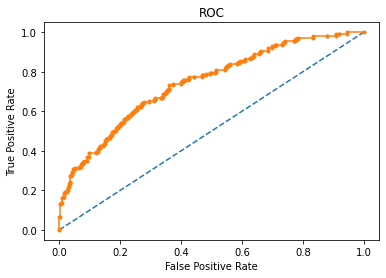

In [361]:
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(train_fpr_logrm,train_tpr_logrm,marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');

## Model Evaluation Based on Test Dataset

In [362]:
ytestpred_logrm=gsb_logrm.predict(xhptest)
ytestprob_logrm=gsb_logrm.predict_proba(xhptest)

### Confusion Matrix

In [397]:
pd.DataFrame(confusion_matrix(yhptest,ytestpred_logrm),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,102,43
Actual 1,50,67


### Classification Report

In [364]:
e=pd.DataFrame(classification_report(yhptest,ytestpred_logrm,output_dict=True)).T.round(2)
e

,precision,recall,f1-score,support
0,0.67,0.70,0.69,145.00
1,0.61,0.57,0.59,117.00
accuracy,0.65,0.65,0.65,0.65
macro avg,0.64,0.64,0.64,262.00
weighted avg,0.64,0.65,0.64,262.00


In [365]:
test_accuracy_logrm=e.iloc[2,2]
test_accuracy_logrm

0.65

In [366]:
test_precision_logrm=e.iloc[1,0]
test_precision_logrm

0.61

In [367]:
test_recall_logrm=e.iloc[1,1]
test_recall_logrm

0.57

In [368]:
test_f1score_logrm=e.iloc[1,2]
test_f1score_logrm

0.59

In [369]:
test_auc_logrm=roc_auc_score(yhptest,ytestprob_logrm[:,1]).round(2)
test_auc_logrm

0.7

### ROC Curve

In [370]:
test_fpr_logrm,test_tpr_logrm,test_thr_logrm=roc_curve(yhptest,ytestprob_logrm[:,1])

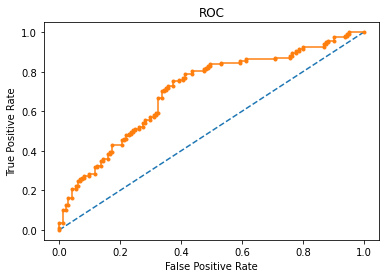

In [371]:
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(test_fpr_logrm,test_tpr_logrm,marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');

# Linear Discriminant Analysis Model - Evaluation

## Model Evaluation Based on Train Dataset

In [372]:
ytrainpred_ldam=gsb_ldam.predict(xhptrain)
ytrainprob_ldam=gsb_ldam.predict_proba(xhptrain)

In [373]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

### Confusion Matrix

In [399]:
pd.DataFrame(confusion_matrix(yhptrain,ytrainpred_ldam),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,252,74
Actual 1,126,158


### Classification Report

In [375]:
m=pd.DataFrame(classification_report(yhptrain,ytrainpred_ldam,output_dict=True)).T.round(2)
m

,precision,recall,f1-score,support
0,0.67,0.77,0.72,326.00
1,0.68,0.56,0.61,284.00
accuracy,0.67,0.67,0.67,0.67
macro avg,0.67,0.66,0.66,610.00
weighted avg,0.67,0.67,0.67,610.00


In [376]:
train_accuracy_ldam=m.iloc[2,2]
train_accuracy_ldam

0.67

In [377]:
train_precision_ldam=m.iloc[1,0]
train_precision_ldam

0.68

In [378]:
train_recall_ldam=m.iloc[1,1]
train_recall_ldam

0.56

In [379]:
train_f1score_ldam=m.iloc[1,2]
train_f1score_ldam

0.61

In [380]:
train_auc_ldam=roc_auc_score(yhptrain,ytrainprob_ldam[:,1]).round(2)
train_auc_ldam

0.74

### ROC Curve

In [381]:
train_fpr_ldam,train_tpr_ldam,train_thr_ldam=roc_curve(yhptrain,ytrainprob_ldam[:,1])

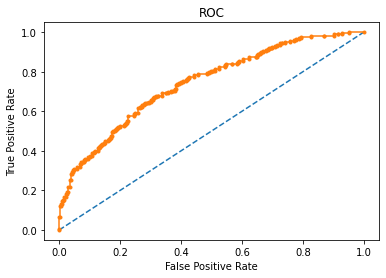

In [382]:
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(train_fpr_ldam,train_tpr_ldam,marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');

## Model Evaluation Based on Test Dataset

In [383]:
ytestpred_ldam=gsb_ldam.predict(xhptest)
ytestprob_ldam=gsb_ldam.predict_proba(xhptest)

### Confusion Matrix

In [398]:
pd.DataFrame(confusion_matrix(yhptest,ytestpred_ldam),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,103,42
Actual 1,52,65


### Classification Report

In [385]:
n=pd.DataFrame(classification_report(yhptest,ytestpred_ldam,output_dict=True)).T.round(2)
n

,precision,recall,f1-score,support
0,0.66,0.71,0.69,145.00
1,0.61,0.56,0.58,117.00
accuracy,0.64,0.64,0.64,0.64
macro avg,0.64,0.63,0.63,262.00
weighted avg,0.64,0.64,0.64,262.00


In [386]:
test_accuracy_ldam=n.iloc[2,2]
test_accuracy_ldam

0.64

In [387]:
test_precision_ldam=n.iloc[1,0]
test_precision_ldam

0.61

In [388]:
test_recall_ldam=n.iloc[1,1]
test_recall_ldam

0.56

In [389]:
test_f1score_ldam=n.iloc[1,2]
test_f1score_ldam

0.58

In [390]:
test_auc_ldam=roc_auc_score(yhptest,ytestprob_ldam[:,1]).round(2)
test_auc_ldam

0.7

### ROC Curve

In [391]:
test_fpr_ldam,test_tpr_ldam,test_thr_ldam=roc_curve(yhptest,ytestprob_ldam[:,1])

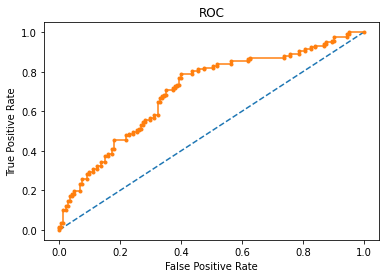

In [392]:
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(test_fpr_ldam,test_tpr_ldam,marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');

# Comparision Models

In [393]:
index=['Accuracy', 'AUC','Precision','Recall','F1 Score']
table = pd.DataFrame({'Logistic Train':[train_accuracy_logrm,train_auc_logrm,train_precision_logrm,train_recall_logrm,train_f1score_logrm],
                      'LDA Train':[train_accuracy_ldam,train_auc_ldam,train_precision_ldam,train_recall_ldam,train_f1score_ldam],
                    'Logistic Test':[test_accuracy_logrm,test_auc_logrm,test_precision_logrm,test_recall_logrm,test_f1score_logrm],
        'LDA Test':[test_accuracy_ldam,test_auc_ldam,test_precision_ldam,test_recall_ldam,test_f1score_ldam]},index=index)
table.T

,Accuracy,AUC,Precision,Recall,F1 Score
Logistic Train,0.68,0.74,0.69,0.57,0.63
LDA Train,0.67,0.74,0.68,0.56,0.61
Logistic Test,0.65,0.70,0.61,0.57,0.59
LDA Test,0.64,0.70,0.61,0.56,0.58


### ROC Curve for the Two Models on the Training Dataset

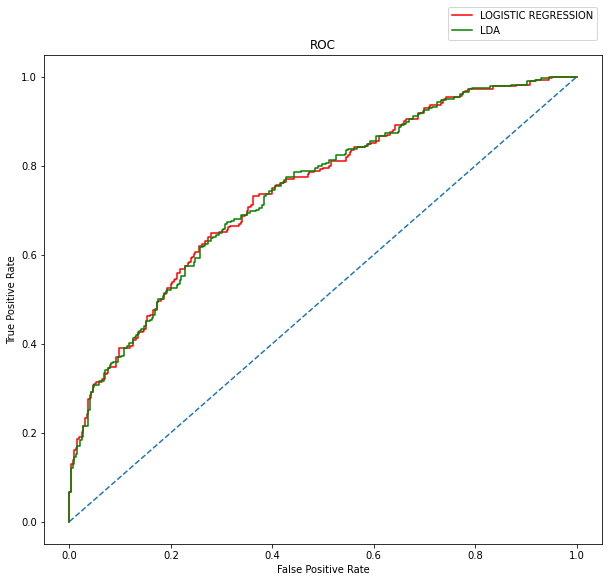

In [401]:
plt.figure(figsize=(10,9))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr_logrm,train_tpr_logrm,color='red',label="LOGISTIC REGRESSION")
plt.plot(train_fpr_ldam,train_tpr_ldam,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

### ROC Curve for the Two models on the Test Dataset

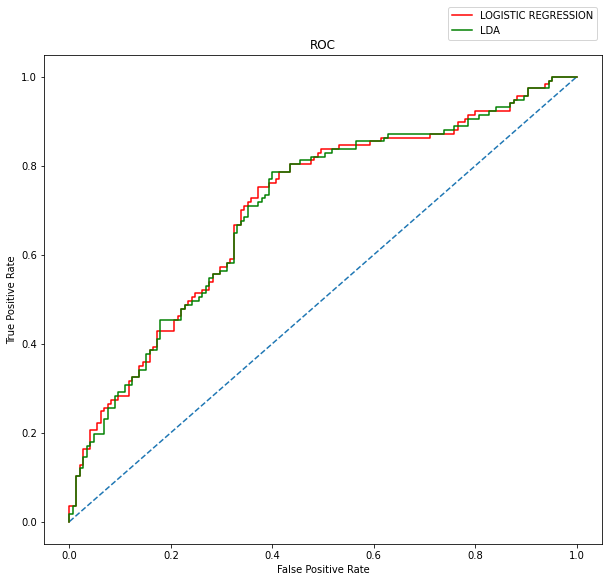

In [400]:
plt.figure(figsize=(10,9))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr_logrm,test_tpr_logrm,color='red',label="LOGISTIC REGRESSION")
plt.plot(test_fpr_ldam,test_tpr_ldam,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

### Q2.4 Inference: Basis on these predictions, what are the insights and recommendations. (Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.)